In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

get_ipython().ast_node_interactivity = 'all'

df = pd.read_csv('source_files/mm_challenge.csv', index_col=False)
pd.options.display.max_columns = None
#print(list(df)
#list(df.pttm_regimen.unique())
#list(df.edmmtyp.unique())
df.head()
df.shape

(7801, 59)

In [2]:
# check for duplicates

df[df.mnppid.duplicated(keep=False)]

,Unnamed: 0,mnppid,edbirthd,edsex,edheight,edweight,edversi,edmaanam,edsympmws,edsympuws,edsympknoch,edsympfrak,edsympleist,edsympmued,edsympschwae,edsympbakt,edsympnfunk,edsympande,edecog,eddusa,edprottyp,edprotg,ediss,edcrabkritc,edcrabkritr,edcrabkrita,edcrabkritb,edmikrogl,edalbugem,edkofscore,edcovmedca,edcovmedreg,edcovmedmol,edcovmednir,edmmtyp,edcrabkrits,edcrabkritli,edcrabkritm,edrisklightch,edriskmprot,edriskbone,edmikroserlevel,edalbuserlevel,m1tm_regimen,m2tm_regimen,m3tm_regimen,pttm_regimen,pttmstart,pttmendeong,pttmendefin,m1tmstart,m1tmendeong,m1tmendefin,m2tmstart,m2tmendeong,m2tmendefin,m3tmstart,m3tmendeong,m3tmendefin


In [3]:
#get only Multiple Myeloma data
df['edmmtyp'].unique()
mm_df = df[df['edmmtyp'] == 'ICD-10 C90.0 Multiples Myelom (symptomatisch)']
mm_df.reset_index(drop=True, inplace=True)
mm_df.head()
mm_df.shape

array(['ICD-10 C90.0 Smouldering Myeloma (asymptomatisch)',
       'ICD-10 C90.0 Multiples Myelom (symptomatisch)',
       'ICD-10 C90.3 Solitäres Plasmozytom',
       'ICD-10 D47.2 MGUS - monoklonale Gammopathie unklarer Signifikanz',
       'ICD-10 C90.1 Plasmazell-Leukämie', 'unbekannt', ' '], dtype=object)

,Unnamed: 0,mnppid,edbirthd,edsex,edheight,edweight,edversi,edmaanam,edsympmws,edsympuws,edsympknoch,edsympfrak,edsympleist,edsympmued,edsympschwae,edsympbakt,edsympnfunk,edsympande,edecog,eddusa,edprottyp,edprotg,ediss,edcrabkritc,edcrabkritr,edcrabkrita,edcrabkritb,edmikrogl,edalbugem,edkofscore,edcovmedca,edcovmedreg,edcovmedmol,edcovmednir,edmmtyp,edcrabkrits,edcrabkritli,edcrabkritm,edrisklightch,edriskmprot,edriskbone,edmikroserlevel,edalbuserlevel,m1tm_regimen,m2tm_regimen,m3tm_regimen,pttm_regimen,pttmstart,pttmendeong,pttmendefin,m1tmstart,m1tmendeong,m1tmendefin,m2tmstart,m2tmendeong,m2tmendefin,m3tmstart,m3tmendeong,m3tmendefin
0,1,2447,6/15/1951,Male,189,90,Compulsory health insurance CHI,No,,,,,,,,,,,0,III: one or more criteria are fulfilled,IgA,7,ISS stage II (neither stage I nor stage III),Yes,No,No,No,Yes,Yes,,,,,,ICD-10 C90.0 Multiples Myelom (symptomatisch),Nein,Nein,Ja,,,,"<3,5 mg/L",Nein,V-X,V-X,POM-X,LEV-X,1/9/2015,9/17/2015,9/17/2015,5/23/2016,1/6/2017,1/6/2017,7/2/2017,11/23/2017,11/23/2017,6/25/2018,6/17/2019,6/17/2019
1,2,5149,6/15/1934,Male,179,78,Compulsory health insurance CHI,No,,,Yes,,,,,,,,1,III: one or more criteria are fulfilled,IgG,13,"ISS stage III (β 2-mikroglobulin > 5,5 mg/l)",No,Yes,No,Yes,Yes,Yes,,,,,,ICD-10 C90.0 Multiples Myelom (symptomatisch),Nein,Nein,Nein,,,,"3,5 - 5,5 mg/L",Nein,Other,V-X,V-X,LEV-X,3/29/2015,6/13/2015,6/13/2015,10/29/2015,7/22/2016,7/22/2016,6/25/2017,9/18/2017,9/18/2017,11/27/2017,6/1/2018,6/1/2018
2,3,6733,6/15/1931,Female,145,76,Compulsory health insurance CHI,No,,,,,,,Yes,,Yes,,1,III: one or more criteria are fulfilled,Unknown/not measured,,"ISS stage III (β 2-mikroglobulin > 5,5 mg/l)",,,,,Yes,Yes,,,,,,ICD-10 C90.0 Multiples Myelom (symptomatisch),,,,,,,">5,5 mg/L",Nein,No CTx,No CTx,No CTx,V-X,1/30/2015,10/28/2015,10/28/2015,,,,,,,,,
3,4,9821,6/15/1951,Female,173,74,Compulsory health insurance CHI,Yes,,,,Yes,,,,,,,0,III: one or more criteria are fulfilled,IgG,89,"ISS stage I (β 2-mikroglobulin < 3,5 mg/l and ...",Yes,No,No,Yes,Yes,Yes,,,,,,ICD-10 C90.0 Multiples Myelom (symptomatisch),,,,,,,"<3,5 mg/L",Nein,V-X,V-X,EMP-X,V-X,4/13/2015,10/16/2015,10/16/2015,12/16/2016,6/9/2017,6/9/2017,3/14/2018,4/26/2019,4/26/2019,9/20/2019,6/25/2020,6/25/2020
4,5,5109,6/15/1956,Male,183,101,Private,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,,Yes,,0,III: one or more criteria are fulfilled,IgG,"87,5","ISS stage I (β 2-mikroglobulin < 3,5 mg/l and ...",No,No,No,Yes,Yes,Yes,,,,,,ICD-10 C90.0 Multiples Myelom (symptomatisch),Ja,Ja,Ja,,,,">5,5 mg/L",Nein,V-X,V-X,R-X,LEV-X,2/27/2015,8/3/2015,8/3/2015,8/25/2015,7/23/2016,7/23/2016,5/9/2017,9/23/2017,9/23/2017,11/27/2017,9/28/2018,9/28/2018


(7153, 59)

In [4]:
mm_df.shape

(7153, 59)

In [5]:
#get only the needed columns, 'pttm_regimen', 'pttmstart', 'pttmendefin', and 'pttmendeong'
first_therapy_df = mm_df[['mnppid', 'pttm_regimen', 'pttmstart', 'pttmendefin','pttmendeong']].copy()
first_therapy_df.reset_index(drop=True, inplace=True)
first_therapy_df.head()
first_therapy_df.shape

,mnppid,pttm_regimen,pttmstart,pttmendefin,pttmendeong
0,2447,LEV-X,1/9/2015,9/17/2015,9/17/2015
1,5149,LEV-X,3/29/2015,6/13/2015,6/13/2015
2,6733,V-X,1/30/2015,10/28/2015,10/28/2015
3,9821,V-X,4/13/2015,10/16/2015,10/16/2015
4,5109,LEV-X,2/27/2015,8/3/2015,8/3/2015


(7153, 5)

In [6]:
#get only the needed columns for second line therapy, 'm1tm_regimen', 'm1tmstart', 'm1tmendefin', and 'm1tmendeong'
second_therapy_df = mm_df[['mnppid', 'm1tm_regimen', 'm1tmstart', 'm1tmendefin','m1tmendeong']].copy()
second_therapy_df.reset_index(drop=True, inplace=True)
second_therapy_df.head()
second_therapy_df.shape

,mnppid,m1tm_regimen,m1tmstart,m1tmendefin,m1tmendeong
0,2447,V-X,5/23/2016,1/6/2017,1/6/2017
1,5149,Other,10/29/2015,7/22/2016,7/22/2016
2,6733,No CTx,,,
3,9821,V-X,12/16/2016,6/9/2017,6/9/2017
4,5109,V-X,8/25/2015,7/23/2016,7/23/2016


(7153, 5)

In [7]:
#get only the needed columns for third line therapy, 'm2tm_regimen', 'm2tmstart', 'm2tmendefin', and 'm2tmendeong'
third_therapy_df = mm_df[['mnppid', 'm2tm_regimen', 'm2tmstart', 'm2tmendefin','m2tmendeong']].copy()
third_therapy_df.reset_index(drop=True, inplace=True)
third_therapy_df.head()
third_therapy_df.shape

,mnppid,m2tm_regimen,m2tmstart,m2tmendefin,m2tmendeong
0,2447,V-X,7/2/2017,11/23/2017,11/23/2017
1,5149,V-X,6/25/2017,9/18/2017,9/18/2017
2,6733,No CTx,,,
3,9821,V-X,3/14/2018,4/26/2019,4/26/2019
4,5109,V-X,5/9/2017,9/23/2017,9/23/2017


(7153, 5)

In [8]:
#get only the needed columns for fourth line therapy, 'm3tm_regimen', 'm3tmstart', 'm3tmendefin', and 'm3tmendeong'
fourth_therapy_df = mm_df[['mnppid', 'm3tm_regimen', 'm3tmstart', 'm3tmendefin','m3tmendeong']].copy()
fourth_therapy_df.reset_index(drop=True, inplace=True)
fourth_therapy_df.head()
fourth_therapy_df.shape

,mnppid,m3tm_regimen,m3tmstart,m3tmendefin,m3tmendeong
0,2447,POM-X,6/25/2018,6/17/2019,6/17/2019
1,5149,V-X,11/27/2017,6/1/2018,6/1/2018
2,6733,No CTx,,,
3,9821,EMP-X,9/20/2019,6/25/2020,6/25/2020
4,5109,R-X,11/27/2017,9/28/2018,9/28/2018


(7153, 5)

In [9]:
# check to see if start date column has empty rows and if 'pttmendefin' and 'pttmendeong'
# are also empty
first_therapy_df[first_therapy_df['pttmstart'].str.strip().astype(bool) == False].count()
second_therapy_df[second_therapy_df['m1tmstart'].str.strip().astype(bool) == False].count()
third_therapy_df[third_therapy_df['m2tmstart'].str.strip().astype(bool) == False].count()
fourth_therapy_df[fourth_therapy_df['m3tmstart'].str.strip().astype(bool) == False].count()

mnppid          55
pttm_regimen    55
pttmstart       55
pttmendefin     55
pttmendeong     55
dtype: int64

mnppid          2502
m1tm_regimen    2502
m1tmstart       2502
m1tmendefin     2502
m1tmendeong     2502
dtype: int64

mnppid          4442
m2tm_regimen    4442
m2tmstart       4442
m2tmendefin     4442
m2tmendeong     4442
dtype: int64

mnppid          5664
m3tm_regimen    5664
m3tmstart       5664
m3tmendefin     5664
m3tmendeong     5664
dtype: int64

In [13]:
# first therapy incidence distribution : replace empty cells with nan
first_therapy_df['pttmstart']= first_therapy_df.pttmstart.replace(r'^\s*$', np.nan, regex=True)
first_therapy_df['pttmstart_clean'] = pd.to_datetime(first_therapy_df['pttmstart'])

# create dateframe of first therapy incidence distribution
first_1half_2021_incidence_df = first_therapy_df.query("'2021-01-01' < pttmstart_clean < '2021-07-01'")
first_1half_2021_incidence_df.shape #1
first_2half_2021_incidence_df = first_therapy_df.query("'2021-07-01' < pttmstart_clean < '2022-01-01'")
first_2half_2021_incidence_df.shape #2
first_1half_2022_incidence_df = first_therapy_df.query("'2022-01-01' < pttmstart_clean < '2022-07-01'")
first_1half_2022_incidence_df.shape #3
first_1half_2021_incidence_df_grouped = first_1half_2021_incidence_df.groupby('pttm_regimen')['pttmstart_clean'].count()
first_1half_2021_incidence_df_grouped #4
first_2half_2021_incidence_df_grouped = first_2half_2021_incidence_df.groupby('pttm_regimen')['pttmstart_clean'].count()
first_2half_2021_incidence_df_grouped #5
first_1half_2022_incidence_df_grouped = first_1half_2022_incidence_df.groupby('pttm_regimen')['pttmstart_clean'].count()
first_1half_2022_incidence_df_grouped #6

# Standardize columns names and order for first line therapy
first_1half_2021_incidence_df_grouped=first_1half_2021_incidence_df_grouped.rename('2021HY1 (368)')
first_2half_2021_incidence_df_grouped=first_2half_2021_incidence_df_grouped.rename('2021HY2 (271)')
first_1half_2022_incidence_df_grouped=first_1half_2022_incidence_df_grouped.rename('2022HY1 (115)')


first_line_incidence_plot_df = pd.DataFrame(first_2half_2021_incidence_df_grouped).join(
                      first_1half_2021_incidence_df_grouped).join(first_1half_2022_incidence_df_grouped)
first_line_incidence_plot_df #10

first_line_incidence_plot_df = first_line_incidence_plot_df.T.fillna(0).reindex(
                                ['2021HY1 (368)','2021HY2 (271)','2022HY1 (115)'])

first_line_incidence_plot_df #11
first_line_incidence_plot_df=first_line_incidence_plot_df.apply(lambda x: (x / (x.sum()* 0.5))*1000, axis=1)
first_line_incidence_plot_df #12

col = ['Other','KYP-X','EMP-X','LEV-X']
first_line_incidence_plot_df['Other']=first_line_incidence_plot_df[col].sum(axis=1)
first_line_incidence_plot_df = first_line_incidence_plot_df.drop(
                                ['KYP-X','EMP-X','LEV-X'], axis=1)

first_line_incidence_plot_df=first_line_incidence_plot_df.reindex(columns=['DAR-X','V-X','R-X', 'Other'])
first_line_incidence_plot_df

58

(368, 7)

(271, 7)

(115, 7)

pttm_regimen
DAR-X     76
EMP-X      1
R-X       69
V-X      222
Name: pttmstart_clean, dtype: int64

pttm_regimen
DAR-X     85
EMP-X      1
KYP-X      2
LEV-X      1
Other      1
R-X       56
V-X      125
Name: pttmstart_clean, dtype: int64

pttm_regimen
DAR-X    50
KYP-X     1
R-X      25
V-X      39
Name: pttmstart_clean, dtype: int64

,2021HY2 (271),2021HY1 (368),2022HY1 (115)
pttm_regimen,,,
DAR-X,85,76.0,50.0
EMP-X,1,1.0,NaN
KYP-X,2,NaN,1.0
LEV-X,1,NaN,NaN
Other,1,NaN,NaN
R-X,56,69.0,25.0
V-X,125,222.0,39.0


pttm_regimen,DAR-X,EMP-X,KYP-X,LEV-X,Other,R-X,V-X
2021HY1 (368),76.0,1.0,0.0,0.0,0.0,69.0,222.0
2021HY2 (271),85.0,1.0,2.0,1.0,1.0,56.0,125.0
2022HY1 (115),50.0,0.0,1.0,0.0,0.0,25.0,39.0


pttm_regimen,DAR-X,EMP-X,KYP-X,LEV-X,Other,R-X,V-X
2021HY1 (368),413.043478,5.434783,0.000000,0.000000,0.000000,375.000000,1206.521739
2021HY2 (271),627.306273,7.380074,14.760148,7.380074,7.380074,413.284133,922.509225
2022HY1 (115),869.565217,0.000000,17.391304,0.000000,0.000000,434.782609,678.260870


pttm_regimen,DAR-X,V-X,R-X,Other
2021HY1 (368),413.043478,1206.521739,375.000000,5.434783
2021HY2 (271),627.306273,922.509225,413.284133,36.900369
2022HY1 (115),869.565217,678.260870,434.782609,17.391304


(0.0, 2100.0000000000005)

(array([0, 1, 2]),
 [Text(0, 0, '2021HY1 (368)'),
  Text(1, 0, '2021HY2 (271)'),
  Text(2, 0, '2022HY1 (115)')])

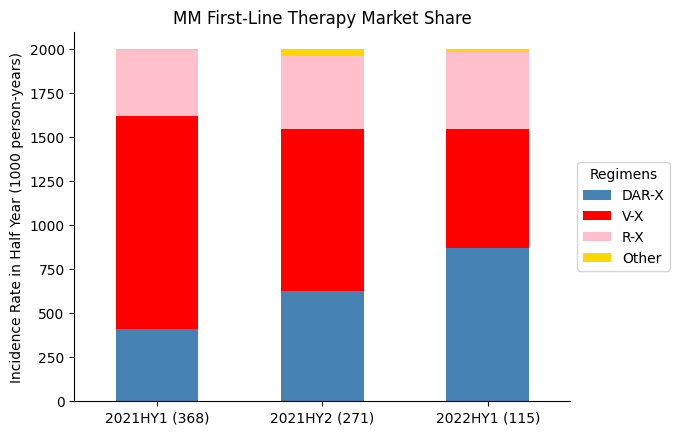

In [12]:
#plot
first_line_incidence_plot_df.plot(kind='bar', stacked=True, title='MM First-Line Therapy Market Share', 
                                 ylabel='Incidence Rate in Half Year (1000 person-years)', 
                                 color=['steelblue','red', 'pink', 'gold']).legend(loc='center left',
                                                                            bbox_to_anchor=(1, 0.5), title='Regimens')

plt.ylim(bottom=0)
plt.xticks(rotation=0)
sns.despine()

In [14]:
# replace empty cells with nan
first_therapy_df['pttmendeong']= first_therapy_df.pttmendeong.replace(r'^\s*$', np.nan, regex=True)
first_therapy_df['pttmendeong_clean'] = pd.to_datetime(first_therapy_df['pttmendeong'])

# create dateframe of first therapy prevalence distribution
first_1half_2021_prevalence_df = first_therapy_df.query(
                                ("pttmstart_clean < '2021-07-01' & pttmendeong_clean > '2021-01-01'") )
first_1half_2021_prevalence_df
first_2half_2021_prevalence_df = first_therapy_df.query(
                                ("pttmstart_clean < '2022-01-01' & pttmendeong_clean > '2021-07-01'") )
first_2half_2021_prevalence_df
first_1half_2022_prevalence_df = first_therapy_df.query(
                                ("pttmstart_clean < '2022-07-01' & pttmendeong_clean > '2022-01-01'") )
first_1half_2022_prevalence_df

first_1half_2021_prevalence_df_grouped = first_1half_2021_prevalence_df.groupby('pttm_regimen')['pttmstart_clean'].count()
first_1half_2021_prevalence_df_grouped
first_2half_2021_prevalence_df_grouped = first_2half_2021_prevalence_df.groupby('pttm_regimen')['pttmstart_clean'].count()
first_2half_2021_prevalence_df_grouped
first_1half_2022_prevalence_df_grouped = first_1half_2022_prevalence_df.groupby('pttm_regimen')['pttmstart_clean'].count()
first_1half_2022_prevalence_df_grouped

# Standardize columns names and order for first line therapy prevalence
first_1half_2021_prevalence_df_grouped = first_1half_2021_prevalence_df_grouped.rename('2021HY1 (870)')
first_2half_2021_prevalence_df_grouped = first_2half_2021_prevalence_df_grouped.rename('2021HY2 (734)')
first_1half_2022_prevalence_df_grouped = first_1half_2022_prevalence_df_grouped.rename('2022HY1 (471)')


first_line_prevalence_plot_df = pd.DataFrame(first_2half_2021_prevalence_df_grouped).join(
                      first_1half_2021_prevalence_df_grouped).join(first_1half_2022_prevalence_df_grouped)

first_line_2022_prevalence_plot_df = first_line_prevalence_plot_df.T.fillna(0).reindex(['2021HY1 (870)','2021HY2 (734)','2022HY1 (471)'])
first_line_2022_prevalence_plot_df

first_line_2022_prevalence_plot_df=first_line_2022_prevalence_plot_df.apply(lambda x: (x / x.sum())*100, axis=1)
first_line_2022_prevalence_plot_df

col = ['Other','KYP-X','EMP-X','LEV-X']
first_line_2022_prevalence_plot_df['Other']=first_line_2022_prevalence_plot_df[col].sum(axis=1)
first_line_2022_prevalence_plot_df = first_line_2022_prevalence_plot_df.drop(
                                ['KYP-X','EMP-X','LEV-X'], axis=1)

first_line_2022_prevalence_plot_df=first_line_2022_prevalence_plot_df.reindex(columns=['DAR-X','V-X','R-X', 'Other'])
first_line_2022_prevalence_plot_df

,mnppid,pttm_regimen,pttmstart,pttmendefin,pttmendeong,pttmstart_clean,pttmendeong_clean
2047,9798,V-X,7/7/2017,,3/31/2022,2017-07-07,2022-03-31
2487,4851,R-X,8/15/2017,10/15/2021,10/15/2021,2017-08-15,2021-10-15
2759,8107,R-X,4/16/2018,,12/31/2021,2018-04-16,2021-12-31
2765,9150,R-X,5/10/2018,,6/30/2021,2018-05-10,2021-06-30
3109,5023,R-X,8/20/2018,9/30/2021,9/30/2021,2018-08-20,2021-09-30
...,...,...,...,...,...,...,...
7147,8470,V-X,1/15/2021,6/15/2021,6/15/2021,2021-01-15,2021-06-15
7148,4351,DAR-X,9/9/2019,1/17/2021,1/17/2021,2019-09-09,2021-01-17
7149,3935,DAR-X,7/19/2019,1/25/2021,1/25/2021,2019-07-19,2021-01-25
7150,2302,DAR-X,4/23/2020,10/23/2021,10/23/2021,2020-04-23,2021-10-23


,mnppid,pttm_regimen,pttmstart,pttmendefin,pttmendeong,pttmstart_clean,pttmendeong_clean
2047,9798,V-X,7/7/2017,,3/31/2022,2017-07-07,2022-03-31
2487,4851,R-X,8/15/2017,10/15/2021,10/15/2021,2017-08-15,2021-10-15
2759,8107,R-X,4/16/2018,,12/31/2021,2018-04-16,2021-12-31
3109,5023,R-X,8/20/2018,9/30/2021,9/30/2021,2018-08-20,2021-09-30
3295,4118,R-X,11/26/2018,10/14/1582,3/31/2022,2018-11-26,2022-03-31
...,...,...,...,...,...,...,...
7122,4390,V-X,1/15/2021,12/15/2021,12/15/2021,2021-01-15,2021-12-15
7125,9245,R-X,10/15/2020,9/15/2021,9/15/2021,2020-10-15,2021-09-15
7134,1811,R-X,10/15/2020,8/15/2021,8/15/2021,2020-10-15,2021-08-15
7150,2302,DAR-X,4/23/2020,10/23/2021,10/23/2021,2020-04-23,2021-10-23


,mnppid,pttm_regimen,pttmstart,pttmendefin,pttmendeong,pttmstart_clean,pttmendeong_clean
2047,9798,V-X,7/7/2017,,3/31/2022,2017-07-07,2022-03-31
3295,4118,R-X,11/26/2018,10/14/1582,3/31/2022,2018-11-26,2022-03-31
3577,1153,DAR-X,1/22/2019,10/14/1582,3/31/2022,2019-01-22,2022-03-31
3797,5059,R-X,3/27/2019,,3/31/2022,2019-03-27,2022-03-31
3805,7222,R-X,1/15/2019,,3/31/2022,2019-01-15,2022-03-31
...,...,...,...,...,...,...,...
7138,8799,DAR-X,1/27/2022,2/3/2022,2/3/2022,2022-01-27,2022-02-03
7139,9795,V-X,2/24/2022,,3/31/2022,2022-02-24,2022-03-31
7144,4372,DAR-X,3/7/2022,,3/31/2022,2022-03-07,2022-03-31
7145,8752,R-X,2/9/2022,,3/31/2022,2022-02-09,2022-03-31


pttm_regimen
DAR-X    204
EMP-X      1
LEV-X      1
R-X      213
V-X      451
Name: pttmstart_clean, dtype: int64

pttm_regimen
DAR-X    236
EMP-X      2
KYP-X      2
LEV-X      1
Other      1
R-X      177
V-X      315
Name: pttmstart_clean, dtype: int64

pttm_regimen
DAR-X    190
EMP-X      1
KYP-X      2
R-X      120
V-X      158
Name: pttmstart_clean, dtype: int64

pttm_regimen,DAR-X,EMP-X,KYP-X,LEV-X,Other,R-X,V-X
2021HY1 (870),204.0,1.0,0.0,1.0,0.0,213.0,451.0
2021HY2 (734),236.0,2.0,2.0,1.0,1.0,177.0,315.0
2022HY1 (471),190.0,1.0,2.0,0.0,0.0,120.0,158.0


pttm_regimen,DAR-X,EMP-X,KYP-X,LEV-X,Other,R-X,V-X
2021HY1 (870),23.448276,0.114943,0.000000,0.114943,0.00000,24.482759,51.839080
2021HY2 (734),32.152589,0.272480,0.272480,0.136240,0.13624,24.114441,42.915531
2022HY1 (471),40.339703,0.212314,0.424628,0.000000,0.00000,25.477707,33.545648


pttm_regimen,DAR-X,V-X,R-X,Other
2021HY1 (870),23.448276,51.839080,24.482759,0.229885
2021HY2 (734),32.152589,42.915531,24.114441,0.817439
2022HY1 (471),40.339703,33.545648,25.477707,0.636943


(0.0, 105.0)

(array([0, 1, 2]),
 [Text(0, 0, '2021HY1 (870)'),
  Text(1, 0, '2021HY2 (734)'),
  Text(2, 0, '2022HY1 (471)')])

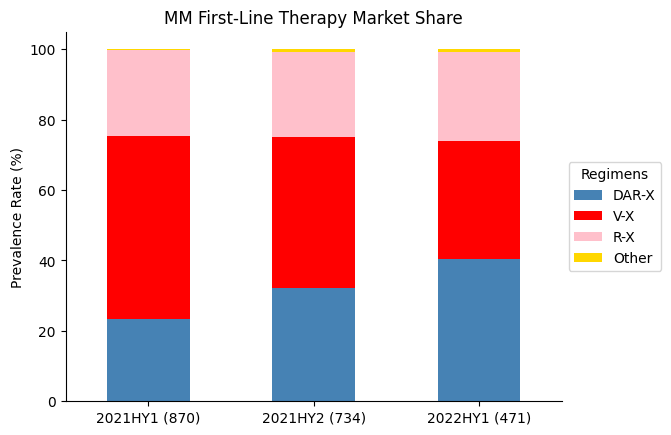

In [15]:
# plot prevalence rate first line therapy
first_line_2022_prevalence_plot_df.plot(kind='bar', stacked=True, title='MM First-Line Therapy Market Share', 
                                 ylabel='Prevalence Rate (%)', 
                                 color=['steelblue','red', 'pink', 'gold']).legend(loc='center left',
                                                                            bbox_to_anchor=(1, 0.5), title='Regimens')

plt.ylim(bottom=0)
plt.xticks(rotation=0)
sns.despine()

In [17]:
# second therapy incidence distribution : replace empty cells with nan
second_therapy_df['m1tmstart']= second_therapy_df.m1tmstart.replace(r'^\s*$', np.nan, regex=True)
second_therapy_df['m1tmstart_clean'] = pd.to_datetime(second_therapy_df['m1tmstart'])

# create dateframe of second therapy incidence distribution
second_1half_2021_incidence_df = second_therapy_df.query("'2021-01-01' < m1tmstart_clean < '2021-07-01'")
second_1half_2021_incidence_df.shape #1
second_2half_2021_incidence_df = second_therapy_df.query("'2021-07-01' < m1tmstart_clean < '2022-01-01'")
second_2half_2021_incidence_df.shape #2
second_1half_2022_incidence_df = second_therapy_df.query("'2022-01-01' < m1tmstart_clean < '2022-07-01'")
second_1half_2022_incidence_df.shape #3
second_1half_2021_incidence_df_grouped = second_1half_2021_incidence_df.groupby('m1tm_regimen')['m1tmstart_clean'].count()
second_1half_2021_incidence_df_grouped #4
second_2half_2021_incidence_df_grouped = second_2half_2021_incidence_df.groupby('m1tm_regimen')['m1tmstart_clean'].count()
second_2half_2021_incidence_df_grouped #5
second_1half_2022_incidence_df_grouped = second_1half_2022_incidence_df.groupby('m1tm_regimen')['m1tmstart_clean'].count()
second_1half_2022_incidence_df_grouped #6

# Standardize columns names and order for first line therapy
second_1half_2021_incidence_df_grouped=second_1half_2021_incidence_df_grouped.rename('2021HY1 (274)')
second_2half_2021_incidence_df_grouped=second_2half_2021_incidence_df_grouped.rename('2021HY2 (299)')
second_1half_2022_incidence_df_grouped=second_1half_2022_incidence_df_grouped.rename('2022HY1 (192)')

second_line_incidence_plot_df = pd.DataFrame(second_1half_2021_incidence_df_grouped).join(
                      second_2half_2021_incidence_df_grouped).join(second_1half_2022_incidence_df_grouped)
second_line_incidence_plot_df #7

second_line_incidence_plot_df = second_line_incidence_plot_df.T.fillna(0)

second_line_incidence_plot_df #8
second_line_incidence_plot_df=second_line_incidence_plot_df.apply(lambda x: (x / (x.sum()* 0.5))*1000, axis=1)
second_line_incidence_plot_df #9

col = ['LEV-X','NIN-X','EMP-X','ISA-X', 'POM-X']
second_line_incidence_plot_df['Other']=second_line_incidence_plot_df[col].sum(axis=1)
second_line_incidence_plot_df = second_line_incidence_plot_df.drop(
                                ['NIN-X','EMP-X','ISA-X', 'POM-X'], axis=1)

second_line_incidence_plot_df=second_line_incidence_plot_df.reindex(columns=['DAR-X','V-X','R-X', 'KYP-X', 'Other'])
second_line_incidence_plot_df

2503

(274, 7)

(299, 7)

(192, 7)

m1tm_regimen
DAR-X    123
EMP-X      7
ISA-X      1
KYP-X     56
LEV-X      4
NIN-X     12
POM-X      2
R-X       31
V-X       38
Name: m1tmstart_clean, dtype: int64

m1tm_regimen
DAR-X    117
EMP-X      3
KYP-X     73
LEV-X      3
NIN-X     24
POM-X      6
R-X       43
V-X       30
Name: m1tmstart_clean, dtype: int64

m1tm_regimen
DAR-X    98
EMP-X     1
KYP-X    44
NIN-X     4
R-X      37
V-X       8
Name: m1tmstart_clean, dtype: int64

,2021HY1 (274),2021HY2 (299),2022HY1 (192)
m1tm_regimen,,,
DAR-X,123,117.0,98.0
EMP-X,7,3.0,1.0
ISA-X,1,NaN,NaN
KYP-X,56,73.0,44.0
LEV-X,4,3.0,NaN
NIN-X,12,24.0,4.0
POM-X,2,6.0,NaN
R-X,31,43.0,37.0
V-X,38,30.0,8.0


m1tm_regimen,DAR-X,EMP-X,ISA-X,KYP-X,LEV-X,NIN-X,POM-X,R-X,V-X
2021HY1 (274),123.0,7.0,1.0,56.0,4.0,12.0,2.0,31.0,38.0
2021HY2 (299),117.0,3.0,0.0,73.0,3.0,24.0,6.0,43.0,30.0
2022HY1 (192),98.0,1.0,0.0,44.0,0.0,4.0,0.0,37.0,8.0


m1tm_regimen,DAR-X,EMP-X,ISA-X,KYP-X,LEV-X,NIN-X,POM-X,R-X,V-X
2021HY1 (274),897.810219,51.094891,7.29927,408.759124,29.19708,87.591241,14.598540,226.277372,277.372263
2021HY2 (299),782.608696,20.066890,0.00000,488.294314,20.06689,160.535117,40.133779,287.625418,200.668896
2022HY1 (192),1020.833333,10.416667,0.00000,458.333333,0.00000,41.666667,0.000000,385.416667,83.333333


m1tm_regimen,DAR-X,V-X,R-X,KYP-X,Other
2021HY1 (274),897.810219,277.372263,226.277372,408.759124,189.781022
2021HY2 (299),782.608696,200.668896,287.625418,488.294314,240.802676
2022HY1 (192),1020.833333,83.333333,385.416667,458.333333,52.083333


(0.0, 2100.0)

(array([0, 1, 2]),
 [Text(0, 0, '2021HY1 (274)'),
  Text(1, 0, '2021HY2 (299)'),
  Text(2, 0, '2022HY1 (192)')])

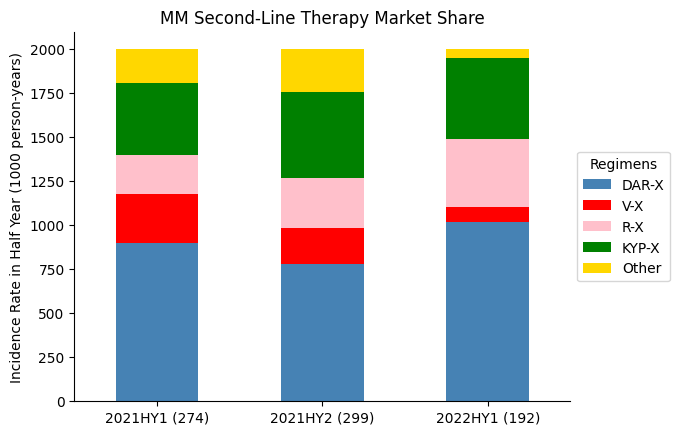

In [18]:
# plot incidence rate for second line therapy

second_line_incidence_plot_df.plot(kind='bar', stacked=True, title='MM Second-Line Therapy Market Share', 
                                 ylabel='Incidence Rate in Half Year (1000 person-years)', 
                                 color=['steelblue','red', 'pink', 'green','gold']).legend(loc='center left',
                                                                            bbox_to_anchor=(1, 0.5), title='Regimens')

plt.ylim(bottom=0)
plt.xticks(rotation=0)
sns.despine()

In [22]:
# second therapy line prevalence distribution replace empty cells with nan
second_therapy_df['m1tmendeong']= second_therapy_df.m1tmendeong.replace(r'^\s*$', np.nan, regex=True)
second_therapy_df['m1tmendeong_clean'] = pd.to_datetime(second_therapy_df['m1tmendeong'])

second_therapy_df['m1tmendeong'].isna().sum()

# create dateframe of second therapy line prevalence distribution
second_1half_2021_prevalence_df = second_therapy_df.query(
                                ("m1tmstart_clean < '2021-07-01' & m1tmendeong_clean > '2021-01-01'") )
second_1half_2021_prevalence_df.shape
second_2half_2021_prevalence_df = second_therapy_df.query(
                                ("m1tmstart_clean < '2022-01-01' & m1tmendeong_clean > '2021-07-01'") )
second_2half_2021_prevalence_df.shape
second_1half_2022_prevalence_df = second_therapy_df.query(
                                ("m1tmstart_clean < '2022-07-01' & m1tmendeong_clean > '2022-01-01'") )
second_1half_2022_prevalence_df.shape

second_1half_2021_prevalence_df_grouped = second_1half_2021_prevalence_df.groupby('m1tm_regimen')['m1tmstart_clean'].count()
second_1half_2021_prevalence_df_grouped
second_2half_2021_prevalence_df_grouped = second_2half_2021_prevalence_df.groupby('m1tm_regimen')['m1tmstart_clean'].count()
second_2half_2021_prevalence_df_grouped
second_1half_2022_prevalence_df_grouped = second_1half_2022_prevalence_df.groupby('m1tm_regimen')['m1tmstart_clean'].count()
second_1half_2022_prevalence_df_grouped

# Standardize columns names and order for second line therapy prevalence
second_1half_2021_prevalence_df_grouped = second_1half_2021_prevalence_df_grouped.rename('2021HY1 (1098)')
second_2half_2021_prevalence_df_grouped = second_2half_2021_prevalence_df_grouped.rename('2021HY2 (1076)')
second_1half_2022_prevalence_df_grouped = second_1half_2022_prevalence_df_grouped.rename('2022HY1 (828)')


second_line_prevalence_plot_df = pd.DataFrame(second_1half_2021_prevalence_df_grouped).join(
                      second_2half_2021_prevalence_df_grouped).join(second_1half_2022_prevalence_df_grouped)

second_line_2022_prevalence_plot_df = second_line_prevalence_plot_df.T.fillna(0)
second_line_2022_prevalence_plot_df

second_line_2022_prevalence_plot_df=second_line_2022_prevalence_plot_df.apply(lambda x: (x / x.sum())*100, axis=1)
second_line_2022_prevalence_plot_df

col = ['LEV-X','NIN-X','EMP-X','ISA-X', 'POM-X']
second_line_2022_prevalence_plot_df['Other']=second_line_2022_prevalence_plot_df[col].sum(axis=1)
second_line_2022_prevalence_plot_df = second_line_2022_prevalence_plot_df.drop(
                                ['LEV-X','NIN-X','EMP-X','ISA-X', 'POM-X'], axis=1)

second_line_2022_prevalence_plot_df=second_line_2022_prevalence_plot_df.reindex(columns=['DAR-X','V-X','R-X', 'KYP-X', 'Other'])
second_line_2022_prevalence_plot_df


2503

(1098, 7)

(1076, 7)

(828, 7)

m1tm_regimen
DAR-X    517
EMP-X     44
ISA-X      1
KYP-X    270
LEV-X      9
NIN-X     39
POM-X     10
R-X      132
V-X       76
Name: m1tmstart_clean, dtype: int64

m1tm_regimen
DAR-X    512
EMP-X     33
ISA-X      1
KYP-X    282
LEV-X      6
NIN-X     52
POM-X     12
R-X      113
V-X       65
Name: m1tmstart_clean, dtype: int64

m1tm_regimen
DAR-X    427
EMP-X     15
ISA-X      1
KYP-X    216
NIN-X     32
POM-X      8
R-X      102
V-X       27
Name: m1tmstart_clean, dtype: int64

m1tm_regimen,DAR-X,EMP-X,ISA-X,KYP-X,LEV-X,NIN-X,POM-X,R-X,V-X
2021HY1 (1098),517.0,44.0,1.0,270.0,9.0,39.0,10.0,132.0,76.0
2021HY2 (1076),512.0,33.0,1.0,282.0,6.0,52.0,12.0,113.0,65.0
2022HY1 (828),427.0,15.0,1.0,216.0,0.0,32.0,8.0,102.0,27.0


m1tm_regimen,DAR-X,EMP-X,ISA-X,KYP-X,LEV-X,NIN-X,POM-X,R-X,V-X
2021HY1 (1098),47.085610,4.007286,0.091075,24.590164,0.819672,3.551913,0.910747,12.021858,6.921676
2021HY2 (1076),47.583643,3.066914,0.092937,26.208178,0.557621,4.832714,1.115242,10.501859,6.040892
2022HY1 (828),51.570048,1.811594,0.120773,26.086957,0.000000,3.864734,0.966184,12.318841,3.260870


m1tm_regimen,DAR-X,V-X,R-X,KYP-X,Other
2021HY1 (1098),47.085610,6.921676,12.021858,24.590164,9.380692
2021HY2 (1076),47.583643,6.040892,10.501859,26.208178,9.665428
2022HY1 (828),51.570048,3.260870,12.318841,26.086957,6.763285


(0.0, 105.0)

(array([0, 1, 2]),
 [Text(0, 0, '2021HY1 (1098)'),
  Text(1, 0, '2021HY2 (1076)'),
  Text(2, 0, '2022HY1 (828)')])

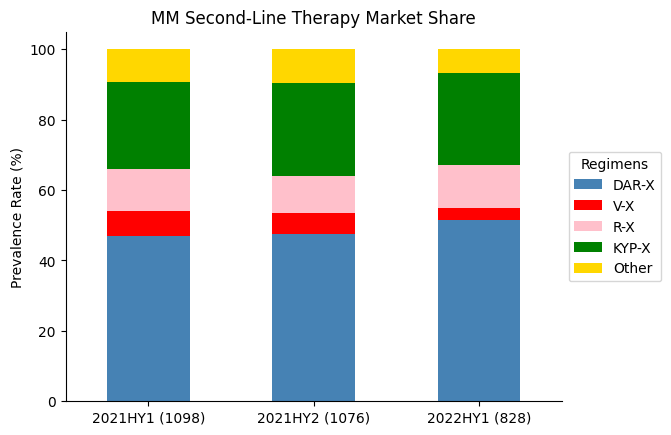

In [23]:
# plot prevalence rate second line therapy
second_line_2022_prevalence_plot_df.plot(kind='bar', stacked=True, title='MM Second-Line Therapy Market Share', 
                                    ylabel='Prevalence Rate (%)', 
                                    color=['steelblue','red', 'pink', 'green', 'gold']).legend(loc='center left',
                                                                            bbox_to_anchor=(1, 0.5), title='Regimens')

plt.ylim(bottom=0)
plt.xticks(rotation=0)
sns.despine()

In [27]:
# third therapy incidence distribution : replace empty cells with nan
third_therapy_df['m2tmstart']= third_therapy_df.m2tmstart.replace(r'^\s*$', np.nan, regex=True)
third_therapy_df['m2tmstart_clean'] = pd.to_datetime(third_therapy_df['m2tmstart'])

# create dateframe of third therapy incidence distribution
third_1half_2021_incidence_df = third_therapy_df.query("'2021-01-01' < m2tmstart_clean < '2021-07-01'")
third_1half_2021_incidence_df.shape #1
third_2half_2021_incidence_df = third_therapy_df.query("'2021-07-01' < m2tmstart_clean < '2022-01-01'")
third_2half_2021_incidence_df.shape #2
third_1half_2022_incidence_df = third_therapy_df.query("'2022-01-01' < m2tmstart_clean < '2022-07-01'")
third_1half_2022_incidence_df.shape #3
third_1half_2021_incidence_df_grouped = third_1half_2021_incidence_df.groupby('m2tm_regimen')['m2tmstart_clean'].count()
third_1half_2021_incidence_df_grouped #4
third_2half_2021_incidence_df_grouped = third_2half_2021_incidence_df.groupby('m2tm_regimen')['m2tmstart_clean'].count()
third_2half_2021_incidence_df_grouped #5
third_1half_2022_incidence_df_grouped = third_1half_2022_incidence_df.groupby('m2tm_regimen')['m2tmstart_clean'].count()
third_1half_2022_incidence_df_grouped #6

# Standardize columns names and order for third line therapy
third_1half_2021_incidence_df_grouped=third_1half_2021_incidence_df_grouped.rename('2021HY1 (168)')
third_2half_2021_incidence_df_grouped=third_2half_2021_incidence_df_grouped.rename('2021HY2 (231)')
third_1half_2022_incidence_df_grouped=third_1half_2022_incidence_df_grouped.rename('2022HY1 (164)')

third_1half_2021_incidence_df_grouped['LEV-X'] = 0
third_line_incidence_plot_df = pd.DataFrame(third_1half_2021_incidence_df_grouped).join(
                      third_2half_2021_incidence_df_grouped).join(third_1half_2022_incidence_df_grouped)
third_line_incidence_plot_df #10

third_line_incidence_plot_df = third_line_incidence_plot_df.T.fillna(0)

third_line_incidence_plot_df #11
third_line_incidence_plot_df=third_line_incidence_plot_df.apply(lambda x: (x / (x.sum()* 0.5))*1000, axis=1)
third_line_incidence_plot_df #12

col = ['LEV-X','NIN-X','R-X','ISA-X', 'BLEN-X']
third_line_incidence_plot_df['Other']=third_line_incidence_plot_df[col].sum(axis=1)
third_line_incidence_plot_df = third_line_incidence_plot_df.drop(
                                ['LEV-X','NIN-X','R-X','ISA-X', 'BLEN-X'], axis=1)

third_line_incidence_plot_df=third_line_incidence_plot_df.reindex(
                                columns=['DAR-X','V-X','EMP-X', 'KYP-X', 'POM-X','Other'])
third_line_incidence_plot_df

(168, 6)

(231, 6)

(164, 6)

m2tm_regimen
BLEN-X     1
DAR-X     60
EMP-X     12
ISA-X      2
KYP-X     23
NIN-X     13
POM-X     50
R-X        1
V-X        6
Name: m2tmstart_clean, dtype: int64

m2tm_regimen
DAR-X    88
EMP-X    32
ISA-X     6
KYP-X    23
LEV-X     6
NIN-X    13
POM-X    30
R-X       5
V-X      28
Name: m2tmstart_clean, dtype: int64

m2tm_regimen
DAR-X    44
EMP-X    33
ISA-X     7
KYP-X    15
NIN-X     3
POM-X    25
R-X       1
V-X      36
Name: m2tmstart_clean, dtype: int64

,2021HY1 (168),2021HY2 (231),2022HY1 (164)
m2tm_regimen,,,
BLEN-X,1,NaN,NaN
DAR-X,60,88.0,44.0
EMP-X,12,32.0,33.0
ISA-X,2,6.0,7.0
KYP-X,23,23.0,15.0
NIN-X,13,13.0,3.0
POM-X,50,30.0,25.0
R-X,1,5.0,1.0
V-X,6,28.0,36.0


m2tm_regimen,BLEN-X,DAR-X,EMP-X,ISA-X,KYP-X,NIN-X,POM-X,R-X,V-X,LEV-X
2021HY1 (168),1.0,60.0,12.0,2.0,23.0,13.0,50.0,1.0,6.0,0.0
2021HY2 (231),0.0,88.0,32.0,6.0,23.0,13.0,30.0,5.0,28.0,6.0
2022HY1 (164),0.0,44.0,33.0,7.0,15.0,3.0,25.0,1.0,36.0,0.0


m2tm_regimen,BLEN-X,DAR-X,EMP-X,ISA-X,KYP-X,NIN-X,POM-X,R-X,V-X,LEV-X
2021HY1 (168),11.904762,714.285714,142.857143,23.809524,273.809524,154.761905,595.238095,11.904762,71.428571,0.000000
2021HY2 (231),0.000000,761.904762,277.056277,51.948052,199.134199,112.554113,259.740260,43.290043,242.424242,51.948052
2022HY1 (164),0.000000,536.585366,402.439024,85.365854,182.926829,36.585366,304.878049,12.195122,439.024390,0.000000


m2tm_regimen,DAR-X,V-X,EMP-X,KYP-X,POM-X,Other
2021HY1 (168),714.285714,71.428571,142.857143,273.809524,595.238095,202.380952
2021HY2 (231),761.904762,242.424242,277.056277,199.134199,259.740260,259.740260
2022HY1 (164),536.585366,439.024390,402.439024,182.926829,304.878049,134.146341


(0.0, 2100.0000000000005)

(array([0, 1, 2]),
 [Text(0, 0, '2021HY1 (168)'),
  Text(1, 0, '2021HY2 (231)'),
  Text(2, 0, '2022HY1 (164)')])

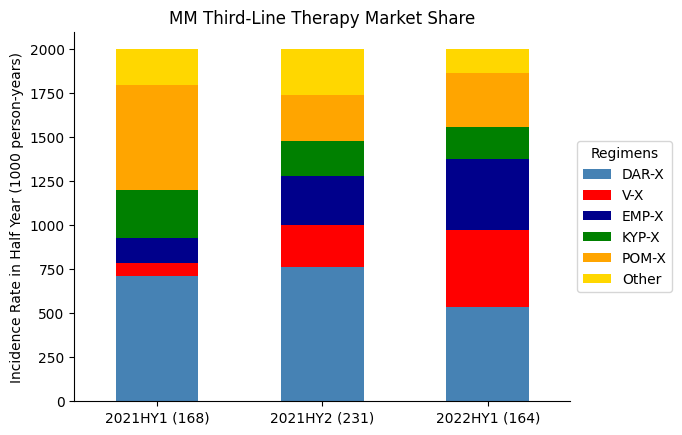

In [29]:
# plot incidence rate for third line therapy

third_line_incidence_plot_df.plot(kind='bar', stacked=True, title='MM Third-Line Therapy Market Share', 
                                 ylabel='Incidence Rate in Half Year (1000 person-years)', 
                                 color=['steelblue','red', 'darkblue', 'green', 'orange','gold']).legend(loc='center left',
                                                                            bbox_to_anchor=(1, 0.5), title='Regimens')

plt.ylim(bottom=0)
plt.xticks(rotation=0)
sns.despine()

In [32]:
# third therapy line prevalence distribution replace empty cells with nan
third_therapy_df['m2tmendeong']= third_therapy_df.m2tmendeong.replace(r'^\s*$', np.nan, regex=True)
third_therapy_df['m2tmendeong_clean'] = pd.to_datetime(third_therapy_df['m2tmendeong'])

third_therapy_df['m2tmendeong'].isna().sum()

# create dateframe of third therapy line prevalence distribution
third_1half_2021_prevalence_df = third_therapy_df.query(
                                ("m2tmstart_clean < '2021-07-01' & m2tmendeong_clean > '2021-01-01'") )
third_1half_2021_prevalence_df.shape
third_2half_2021_prevalence_df = third_therapy_df.query(
                                ("m2tmstart_clean < '2022-01-01' & m2tmendeong_clean > '2021-07-01'") )
third_2half_2021_prevalence_df.shape
third_1half_2022_prevalence_df = third_therapy_df.query(
                                ("m2tmstart_clean < '2022-07-01' & m2tmendeong_clean > '2022-01-01'") )
third_1half_2022_prevalence_df.shape

third_1half_2021_prevalence_df_grouped = third_1half_2021_prevalence_df.groupby('m2tm_regimen')['m2tmstart_clean'].count()
third_1half_2021_prevalence_df_grouped
third_2half_2021_prevalence_df_grouped = third_2half_2021_prevalence_df.groupby('m2tm_regimen')['m2tmstart_clean'].count()
third_2half_2021_prevalence_df_grouped
third_1half_2022_prevalence_df_grouped = third_1half_2022_prevalence_df.groupby('m2tm_regimen')['m2tmstart_clean'].count()
third_1half_2022_prevalence_df_grouped

# Standardize columns names and order for third line therapy prevalence
third_1half_2021_prevalence_df_grouped = third_1half_2021_prevalence_df_grouped.rename('2021HY1 (620)')
third_2half_2021_prevalence_df_grouped = third_2half_2021_prevalence_df_grouped.rename('2021HY2 (644)')
third_1half_2022_prevalence_df_grouped = third_1half_2022_prevalence_df_grouped.rename('2022HY1 (538)')

third_1half_2021_prevalence_df_grouped['LEV-X'] = 0

third_line_prevalence_plot_df = pd.DataFrame(third_1half_2021_prevalence_df_grouped).join(
                      third_2half_2021_prevalence_df_grouped).join(third_1half_2022_prevalence_df_grouped)

third_line_2022_prevalence_plot_df = third_line_prevalence_plot_df.T.fillna(0)
third_line_2022_prevalence_plot_df

third_line_2022_prevalence_plot_df=third_line_2022_prevalence_plot_df.apply(lambda x: (x / x.sum())*100, axis=1)
third_line_2022_prevalence_plot_df

col = ['FAR-X','V-X','R-X','ISA-X', 'BLEN-X', 'Other', 'LEV-X']
third_line_2022_prevalence_plot_df['Other']=third_line_2022_prevalence_plot_df[col].sum(axis=1)
third_line_2022_prevalence_plot_df = third_line_2022_prevalence_plot_df.drop(
                                ['FAR-X','V-X','R-X','ISA-X', 'BLEN-X', 'LEV-X'], axis=1)

third_line_2022_prevalence_plot_df=third_line_2022_prevalence_plot_df.reindex(
                                columns=['DAR-X','EMP-X','NIN-X', 'KYP-X','POM-X','Other'])
third_line_2022_prevalence_plot_df

4442

(620, 7)

(644, 7)

(538, 7)

m2tm_regimen
BLEN-X      1
DAR-X     262
EMP-X      47
FAR-X       2
ISA-X       2
KYP-X      54
NIN-X      49
Other       1
POM-X     167
R-X        11
V-X        24
Name: m2tmstart_clean, dtype: int64

m2tm_regimen
DAR-X    269
EMP-X     63
FAR-X      1
ISA-X      7
KYP-X     60
LEV-X      6
NIN-X     45
Other      1
POM-X    143
R-X       11
V-X       38
Name: m2tmstart_clean, dtype: int64

m2tm_regimen
DAR-X    231
EMP-X     78
ISA-X     12
KYP-X     49
NIN-X     26
Other      1
POM-X     76
R-X        7
V-X       58
Name: m2tmstart_clean, dtype: int64

m2tm_regimen,BLEN-X,DAR-X,EMP-X,FAR-X,ISA-X,KYP-X,NIN-X,Other,POM-X,R-X,V-X,LEV-X
2021HY1 (620),1.0,262.0,47.0,2.0,2.0,54.0,49.0,1.0,167.0,11.0,24.0,0.0
2021HY2 (644),0.0,269.0,63.0,1.0,7.0,60.0,45.0,1.0,143.0,11.0,38.0,6.0
2022HY1 (538),0.0,231.0,78.0,0.0,12.0,49.0,26.0,1.0,76.0,7.0,58.0,0.0


m2tm_regimen,BLEN-X,DAR-X,EMP-X,FAR-X,ISA-X,KYP-X,NIN-X,Other,POM-X,R-X,V-X,LEV-X
2021HY1 (620),0.16129,42.258065,7.580645,0.322581,0.322581,8.709677,7.903226,0.161290,26.935484,1.774194,3.870968,0.000000
2021HY2 (644),0.00000,41.770186,9.782609,0.155280,1.086957,9.316770,6.987578,0.155280,22.204969,1.708075,5.900621,0.931677
2022HY1 (538),0.00000,42.936803,14.498141,0.000000,2.230483,9.107807,4.832714,0.185874,14.126394,1.301115,10.780669,0.000000


m2tm_regimen,DAR-X,EMP-X,NIN-X,KYP-X,POM-X,Other
2021HY1 (620),42.258065,7.580645,7.903226,8.709677,26.935484,6.612903
2021HY2 (644),41.770186,9.782609,6.987578,9.316770,22.204969,9.937888
2022HY1 (538),42.936803,14.498141,4.832714,9.107807,14.126394,14.498141


(0.0, 104.99999999999999)

(array([0, 1, 2]),
 [Text(0, 0, '2021HY1 (620)'),
  Text(1, 0, '2021HY2 (644)'),
  Text(2, 0, '2022HY1 (538)')])

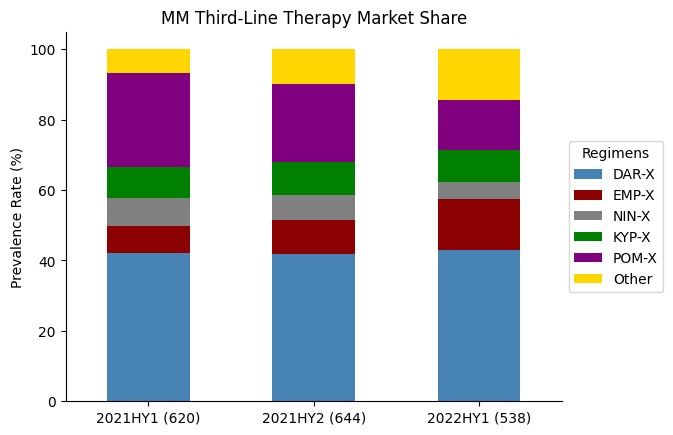

In [33]:
# plot prevalence rate third line therapy
third_line_2022_prevalence_plot_df.plot(kind='bar', stacked=True, title='MM Third-Line Therapy Market Share', 
                                    ylabel='Prevalence Rate (%)', 
                                    color=['steelblue','darkred', 'grey', 'green', 'purple', 'gold']).legend(loc='center left',
                                                                            bbox_to_anchor=(1, 0.5), title='Regimens')

plt.ylim(bottom=0)
plt.xticks(rotation=0)
sns.despine()

In [36]:
# fourth therapy incidence distribution : replace empty cells with nan
fourth_therapy_df['m3tmstart']= fourth_therapy_df.m3tmstart.replace(r'^\s*$', np.nan, regex=True)
fourth_therapy_df['m3tmstart_clean'] = pd.to_datetime(fourth_therapy_df['m3tmstart'])

# create dateframe of fourth therapy incidence distribution
fourth_1half_2021_incidence_df = fourth_therapy_df.query("'2021-01-01' < m3tmstart_clean < '2021-07-01'")
fourth_1half_2021_incidence_df.shape #1
fourth_2half_2021_incidence_df = fourth_therapy_df.query("'2021-07-01' < m3tmstart_clean < '2022-01-01'")
fourth_2half_2021_incidence_df.shape #2
fourth_1half_2022_incidence_df = fourth_therapy_df.query("'2022-01-01' < m3tmstart_clean < '2022-07-01'")
fourth_1half_2022_incidence_df.shape #3
fourth_1half_2021_incidence_df_grouped = fourth_1half_2021_incidence_df.groupby('m3tm_regimen')['m3tmstart_clean'].count()
fourth_1half_2021_incidence_df_grouped #4
fourth_2half_2021_incidence_df_grouped = fourth_2half_2021_incidence_df.groupby('m3tm_regimen')['m3tmstart_clean'].count()
fourth_2half_2021_incidence_df_grouped #5
fourth_1half_2022_incidence_df_grouped = fourth_1half_2022_incidence_df.groupby('m3tm_regimen')['m3tmstart_clean'].count()
fourth_1half_2022_incidence_df_grouped #6

# Standardize columns names and order for fourth line therapy
fourth_1half_2021_incidence_df_grouped=fourth_1half_2021_incidence_df_grouped.rename('2021HY1 (168)')
fourth_2half_2021_incidence_df_grouped=fourth_2half_2021_incidence_df_grouped.rename('2021HY2 (231)')
fourth_1half_2022_incidence_df_grouped=fourth_1half_2022_incidence_df_grouped.rename('2022HY1 (164)')

fourth_1half_2021_incidence_df_grouped['R-X'] = 0
fourth_1half_2021_incidence_df_grouped['BLEN-X'] = 0

fourth_line_incidence_plot_df = pd.DataFrame(fourth_1half_2021_incidence_df_grouped).join(
                      fourth_2half_2021_incidence_df_grouped).join(fourth_1half_2022_incidence_df_grouped)
fourth_line_incidence_plot_df #10

fourth_line_incidence_plot_df = fourth_line_incidence_plot_df.T.fillna(0)

fourth_line_incidence_plot_df #11
fourth_line_incidence_plot_df=fourth_line_incidence_plot_df.apply(lambda x: (x / (x.sum()* 0.5))*1000, axis=1)
fourth_line_incidence_plot_df #12

col = ['LEV-X','R-X','ISA-X', 'BLEN-X', 'Other']
fourth_line_incidence_plot_df['Other']=fourth_line_incidence_plot_df[col].sum(axis=1)
fourth_line_incidence_plot_df = fourth_line_incidence_plot_df.drop(
                                ['LEV-X','R-X','ISA-X', 'BLEN-X'], axis=1)

fourth_line_incidence_plot_df=fourth_line_incidence_plot_df.reindex(
                                columns=['DAR-X','V-X','EMP-X', 'KYP-X', 'POM-X','NIN-X','Other'])
fourth_line_incidence_plot_df

(110, 6)

(138, 6)

(71, 6)

m3tm_regimen
DAR-X    24
EMP-X    14
ISA-X     6
KYP-X    21
LEV-X     5
NIN-X    15
Other     3
POM-X    18
V-X       4
Name: m3tmstart_clean, dtype: int64

m3tm_regimen
DAR-X    27
EMP-X    19
ISA-X     5
KYP-X    22
LEV-X     5
NIN-X     6
POM-X    24
R-X       1
V-X      29
Name: m3tmstart_clean, dtype: int64

m3tm_regimen
BLEN-X     1
DAR-X      5
EMP-X     27
ISA-X      3
KYP-X     10
LEV-X      1
NIN-X      5
POM-X     15
V-X        4
Name: m3tmstart_clean, dtype: int64

,2021HY1 (168),2021HY2 (231),2022HY1 (164)
m3tm_regimen,,,
DAR-X,24,27.0,5.0
EMP-X,14,19.0,27.0
ISA-X,6,5.0,3.0
KYP-X,21,22.0,10.0
LEV-X,5,5.0,1.0
NIN-X,15,6.0,5.0
Other,3,NaN,NaN
POM-X,18,24.0,15.0
V-X,4,29.0,4.0


m3tm_regimen,DAR-X,EMP-X,ISA-X,KYP-X,LEV-X,NIN-X,Other,POM-X,V-X,R-X,BLEN-X
2021HY1 (168),24.0,14.0,6.0,21.0,5.0,15.0,3.0,18.0,4.0,0.0,0.0
2021HY2 (231),27.0,19.0,5.0,22.0,5.0,6.0,0.0,24.0,29.0,1.0,0.0
2022HY1 (164),5.0,27.0,3.0,10.0,1.0,5.0,0.0,15.0,4.0,0.0,1.0


m3tm_regimen,DAR-X,EMP-X,ISA-X,KYP-X,LEV-X,NIN-X,Other,POM-X,V-X,R-X,BLEN-X
2021HY1 (168),436.363636,254.545455,109.090909,381.818182,90.909091,272.727273,54.545455,327.272727,72.727273,0.000000,0.000000
2021HY2 (231),391.304348,275.362319,72.463768,318.840580,72.463768,86.956522,0.000000,347.826087,420.289855,14.492754,0.000000
2022HY1 (164),140.845070,760.563380,84.507042,281.690141,28.169014,140.845070,0.000000,422.535211,112.676056,0.000000,28.169014


m3tm_regimen,DAR-X,V-X,EMP-X,KYP-X,POM-X,NIN-X,Other
2021HY1 (168),436.363636,72.727273,254.545455,381.818182,327.272727,272.727273,254.545455
2021HY2 (231),391.304348,420.289855,275.362319,318.840580,347.826087,86.956522,159.420290
2022HY1 (164),140.845070,112.676056,760.563380,281.690141,422.535211,140.845070,140.845070


(0.0, 2100.0000000000005)

(array([0, 1, 2]),
 [Text(0, 0, '2021HY1 (168)'),
  Text(1, 0, '2021HY2 (231)'),
  Text(2, 0, '2022HY1 (164)')])

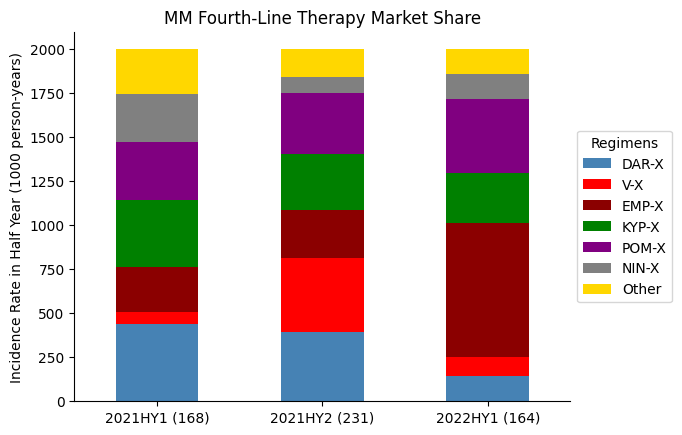

In [37]:
# plot incidence rate for fourth line therapy

fourth_line_incidence_plot_df.plot(kind='bar', stacked=True, title='MM Fourth-Line Therapy Market Share', 
                                 ylabel='Incidence Rate in Half Year (1000 person-years)', 
                                 color=['steelblue','red', 'darkred', 'green', 'purple','grey','gold']).legend(
                                 loc='center left',
                                                                            bbox_to_anchor=(1, 0.5), title='Regimens')

plt.ylim(bottom=0)
plt.xticks(rotation=0)
sns.despine()

In [40]:
# fourth therapy line prevalence distribution replace empty cells with nan
fourth_therapy_df['m3tmendeong']= fourth_therapy_df.m3tmendeong.replace(r'^\s*$', np.nan, regex=True)
fourth_therapy_df['m3tmendeong_clean'] = pd.to_datetime(fourth_therapy_df['m3tmendeong'])

fourth_therapy_df['m3tmendeong'].isna().sum()

# create dateframe of fourth therapy line prevalence distribution
fourth_1half_2021_prevalence_df = fourth_therapy_df.query(
                                ("m3tmstart_clean < '2021-07-01' & m3tmendeong_clean > '2021-01-01'") )
fourth_1half_2021_prevalence_df.shape
fourth_2half_2021_prevalence_df = fourth_therapy_df.query(
                                ("m3tmstart_clean < '2022-01-01' & m3tmendeong_clean > '2021-07-01'") )
fourth_2half_2021_prevalence_df.shape
fourth_1half_2022_prevalence_df = fourth_therapy_df.query(
                                ("m3tmstart_clean < '2022-07-01' & m3tmendeong_clean > '2022-01-01'") )
fourth_1half_2022_prevalence_df.shape

fourth_1half_2021_prevalence_df_grouped = fourth_1half_2021_prevalence_df.groupby('m3tm_regimen')['m3tmstart_clean'].count()
fourth_1half_2021_prevalence_df_grouped
fourth_2half_2021_prevalence_df_grouped = fourth_2half_2021_prevalence_df.groupby('m3tm_regimen')['m3tmstart_clean'].count()
fourth_2half_2021_prevalence_df_grouped
fourth_1half_2022_prevalence_df_grouped = fourth_1half_2022_prevalence_df.groupby('m3tm_regimen')['m3tmstart_clean'].count()
fourth_1half_2022_prevalence_df_grouped

# Standardize columns names and order for fourth line therapy prevalence
fourth_1half_2021_prevalence_df_grouped = fourth_1half_2021_prevalence_df_grouped.rename('2021HY1 (313)')
fourth_2half_2021_prevalence_df_grouped = fourth_2half_2021_prevalence_df_grouped.rename('2021HY2 (314)')
fourth_1half_2022_prevalence_df_grouped = fourth_1half_2022_prevalence_df_grouped.rename('2022HY1 (228)')


fourth_1half_2021_prevalence_df_grouped['BLEN-X'] = 0

fourth_line_prevalence_plot_df = pd.DataFrame(fourth_1half_2021_prevalence_df_grouped).join(
                      fourth_2half_2021_prevalence_df_grouped).join(fourth_1half_2022_prevalence_df_grouped)

fourth_line_2022_prevalence_plot_df = fourth_line_prevalence_plot_df.T.fillna(0)
fourth_line_2022_prevalence_plot_df

fourth_line_2022_prevalence_plot_df=fourth_line_2022_prevalence_plot_df.apply(lambda x: (x / x.sum())*100, axis=1)
fourth_line_2022_prevalence_plot_df

col = ['FAR-X','R-X','ISA-X', 'BLEN-X', 'Other', 'LEV-X']
fourth_line_2022_prevalence_plot_df['Other']=fourth_line_2022_prevalence_plot_df[col].sum(axis=1)
fourth_line_2022_prevalence_plot_df = fourth_line_2022_prevalence_plot_df.drop(
                                ['FAR-X','R-X','ISA-X', 'BLEN-X', 'LEV-X'], axis=1)

fourth_line_2022_prevalence_plot_df=fourth_line_2022_prevalence_plot_df.reindex(
                                columns=['DAR-X','V-X','EMP-X','NIN-X', 'KYP-X','POM-X','Other'])
fourth_line_2022_prevalence_plot_df

5664

(313, 7)

(314, 7)

(228, 7)

m3tm_regimen
DAR-X    87
EMP-X    35
FAR-X     2
ISA-X     6
KYP-X    33
LEV-X     7
NIN-X    51
Other     4
POM-X    65
R-X       5
V-X      18
Name: m3tmstart_clean, dtype: int64

m3tm_regimen
DAR-X    77
EMP-X    40
FAR-X     2
ISA-X     9
KYP-X    39
LEV-X     9
NIN-X    35
Other     3
POM-X    60
R-X       4
V-X      36
Name: m3tmstart_clean, dtype: int64

m3tm_regimen
BLEN-X     1
DAR-X     42
EMP-X     53
ISA-X      7
KYP-X     38
LEV-X      3
NIN-X     17
POM-X     41
R-X        1
V-X       25
Name: m3tmstart_clean, dtype: int64

m3tm_regimen,DAR-X,EMP-X,FAR-X,ISA-X,KYP-X,LEV-X,NIN-X,Other,POM-X,R-X,V-X,BLEN-X
2021HY1 (313),87.0,35.0,2.0,6.0,33.0,7.0,51.0,4.0,65.0,5.0,18.0,0.0
2021HY2 (314),77.0,40.0,2.0,9.0,39.0,9.0,35.0,3.0,60.0,4.0,36.0,0.0
2022HY1 (228),42.0,53.0,0.0,7.0,38.0,3.0,17.0,0.0,41.0,1.0,25.0,1.0


m3tm_regimen,DAR-X,EMP-X,FAR-X,ISA-X,KYP-X,LEV-X,NIN-X,Other,POM-X,R-X,V-X,BLEN-X
2021HY1 (313),27.795527,11.182109,0.638978,1.916933,10.543131,2.236422,16.293930,1.277955,20.766773,1.597444,5.750799,0.000000
2021HY2 (314),24.522293,12.738854,0.636943,2.866242,12.420382,2.866242,11.146497,0.955414,19.108280,1.273885,11.464968,0.000000
2022HY1 (228),18.421053,23.245614,0.000000,3.070175,16.666667,1.315789,7.456140,0.000000,17.982456,0.438596,10.964912,0.438596


m3tm_regimen,DAR-X,V-X,EMP-X,NIN-X,KYP-X,POM-X,Other
2021HY1 (313),27.795527,5.750799,11.182109,16.293930,10.543131,20.766773,7.667732
2021HY2 (314),24.522293,11.464968,12.738854,11.146497,12.420382,19.108280,8.598726
2022HY1 (228),18.421053,10.964912,23.245614,7.456140,16.666667,17.982456,5.263158


(0.0, 105.00000000000001)

(array([0, 1, 2]),
 [Text(0, 0, '2021HY1 (313)'),
  Text(1, 0, '2021HY2 (314)'),
  Text(2, 0, '2022HY1 (228)')])

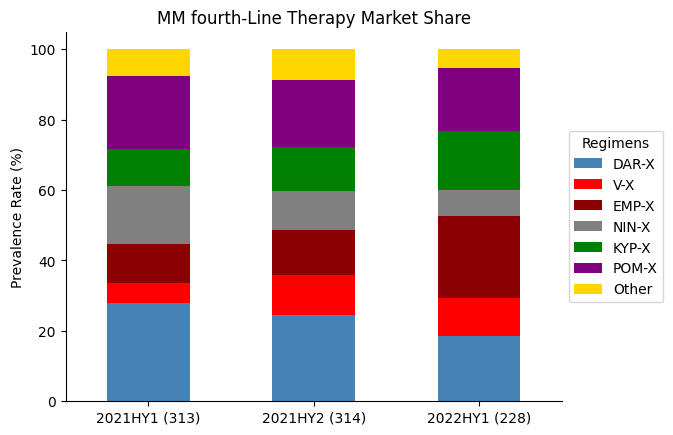

In [41]:
# plot prevalence rate fourth line therapy
fourth_line_2022_prevalence_plot_df.plot(kind='bar', stacked=True, title='MM fourth-Line Therapy Market Share', 
                                    ylabel='Prevalence Rate (%)', 
                                    color=['steelblue','red','darkred', 'grey', 'green', 'purple', 'gold']).legend(loc='center left',
                                                                            bbox_to_anchor=(1, 0.5), title='Regimens')

plt.ylim(bottom=0)
plt.xticks(rotation=0)
sns.despine()

In [13]:
# drop empty start date rows

first_therapy_df_minus_empty= first_therapy_df[first_therapy_df['pttmstart'].str.strip().astype(bool)].copy()
first_therapy_df_minus_empty.reset_index(drop=True, inplace=True)
first_therapy_df_minus_empty.shape
second_therapy_df_minus_empty= second_therapy_df[second_therapy_df['m1tmstart'].str.strip().astype(bool)].copy()
second_therapy_df_minus_empty.reset_index(drop=True, inplace=True)
second_therapy_df_minus_empty.shape
third_therapy_df_minus_empty= third_therapy_df[third_therapy_df['m2tmstart'].str.strip().astype(bool)].copy()
third_therapy_df_minus_empty.reset_index(drop=True, inplace=True)
third_therapy_df_minus_empty.shape
fourth_therapy_df_minus_empty= fourth_therapy_df[fourth_therapy_df['m3tmstart'].str.strip().astype(bool)].copy()
fourth_therapy_df_minus_empty.reset_index(drop=True, inplace=True)
fourth_therapy_df_minus_empty.shape

(7153, 7)

(4651, 5)

(2711, 5)

(1489, 5)

In [14]:
# get prevalence data



In [15]:
# clean start date column
first_therapy_df_minus_empty['pttmstart_clean'] = pd.to_datetime(first_therapy_df_minus_empty['pttmstart'])
second_therapy_df_minus_empty['m1tmstart_clean'] = pd.to_datetime(second_therapy_df_minus_empty['m1tmstart'])
third_therapy_df_minus_empty['m2tmstart_clean'] = pd.to_datetime(third_therapy_df_minus_empty['m2tmstart'])
fourth_therapy_df_minus_empty['m3tmstart_clean'] = pd.to_datetime(fourth_therapy_df_minus_empty['m3tmstart'])
first_therapy_df_minus_empty.head()

,mnppid,pttm_regimen,pttmstart,pttmendefin,pttmendeong,pttmstart_clean,pttmendeong_clean
0,2447,LEV-X,1/9/2015,9/17/2015,9/17/2015,2015-01-09,2015-09-17
1,5149,LEV-X,3/29/2015,6/13/2015,6/13/2015,2015-03-29,2015-06-13
2,6733,V-X,1/30/2015,10/28/2015,10/28/2015,2015-01-30,2015-10-28
3,9821,V-X,4/13/2015,10/16/2015,10/16/2015,2015-04-13,2015-10-16
4,5109,LEV-X,2/27/2015,8/3/2015,8/3/2015,2015-02-27,2015-08-03


In [16]:
# create dateframe of first therapy distribution
first_1half_2021_df = first_therapy_df_minus_empty.query("'2021-01-01' < pttmstart_clean < '2021-07-01'")
first_1half_2021_df.shape
first_2half_2021_df = first_therapy_df_minus_empty.query("'2021-07-01' < pttmstart_clean < '2022-01-01'")
first_2half_2021_df.shape
first_1half_2022_df = first_therapy_df_minus_empty.query("'2022-01-01' < pttmstart_clean < '2022-07-01'")
first_1half_2022_df.shape
first_1half_2021_df_grouped = first_1half_2021_df.groupby('pttm_regimen')['pttmstart_clean'].count()
first_1half_2021_df_grouped
first_2half_2021_df_grouped = first_2half_2021_df.groupby('pttm_regimen')['pttmstart_clean'].count()
first_2half_2021_df_grouped
first_1half_2022_df_grouped = first_1half_2022_df.groupby('pttm_regimen')['pttmstart_clean'].count()
first_1half_2022_df_grouped

(368, 7)

(271, 7)

(115, 7)

pttm_regimen
DAR-X     76
EMP-X      1
R-X       69
V-X      222
Name: pttmstart_clean, dtype: int64

pttm_regimen
DAR-X     85
EMP-X      1
KYP-X      2
LEV-X      1
Other      1
R-X       56
V-X      125
Name: pttmstart_clean, dtype: int64

pttm_regimen
DAR-X    50
KYP-X     1
R-X      25
V-X      39
Name: pttmstart_clean, dtype: int64

In [17]:
# create dateframe of second therapy distribution
second_1half_2021_df = second_therapy_df_minus_empty.query("'2021-01-01' < m1tmstart_clean < '2021-07-01'")
second_1half_2021_df.shape
second_2half_2021_df = second_therapy_df_minus_empty.query("'2021-07-01' < m1tmstart_clean < '2022-01-01'")
second_2half_2021_df.shape
second_1half_2022_df = second_therapy_df_minus_empty.query("'2022-01-01' < m1tmstart_clean < '2022-07-01'")
second_1half_2022_df.shape
second_1half_2021_df_grouped = second_1half_2021_df.groupby('m1tm_regimen')['m1tmstart_clean'].count()
second_1half_2021_df_grouped
second_2half_2021_df_grouped = second_2half_2021_df.groupby('m1tm_regimen')['m1tmstart_clean'].count()
second_2half_2021_df_grouped
second_1half_2022_df_grouped = second_1half_2022_df.groupby('m1tm_regimen')['m1tmstart_clean'].count()
second_1half_2022_df_grouped

(274, 6)

(299, 6)

(192, 6)

m1tm_regimen
DAR-X    123
EMP-X      7
ISA-X      1
KYP-X     56
LEV-X      4
NIN-X     12
POM-X      2
R-X       31
V-X       38
Name: m1tmstart_clean, dtype: int64

m1tm_regimen
DAR-X    117
EMP-X      3
KYP-X     73
LEV-X      3
NIN-X     24
POM-X      6
R-X       43
V-X       30
Name: m1tmstart_clean, dtype: int64

m1tm_regimen
DAR-X    98
EMP-X     1
KYP-X    44
NIN-X     4
R-X      37
V-X       8
Name: m1tmstart_clean, dtype: int64

In [18]:
# create dateframe of third therapy distribution
third_1half_2021_df = third_therapy_df_minus_empty.query("'2021-01-01' < m2tmstart_clean < '2021-07-01'")
third_1half_2021_df.shape
third_2half_2021_df = third_therapy_df_minus_empty.query("'2021-07-01' < m2tmstart_clean < '2022-01-01'")
third_2half_2021_df.shape
third_1half_2022_df = third_therapy_df_minus_empty.query("'2022-01-01' < m2tmstart_clean < '2022-07-01'")
third_1half_2022_df.shape
third_1half_2021_df_grouped = third_1half_2021_df.groupby('m2tm_regimen')['m2tmstart_clean'].count()
third_1half_2021_df_grouped
third_2half_2021_df_grouped = third_2half_2021_df.groupby('m2tm_regimen')['m2tmstart_clean'].count()
third_2half_2021_df_grouped
third_1half_2022_df_grouped = third_1half_2022_df.groupby('m2tm_regimen')['m2tmstart_clean'].count()
third_1half_2022_df_grouped

(168, 6)

(231, 6)

(164, 6)

m2tm_regimen
BLEN-X     1
DAR-X     60
EMP-X     12
ISA-X      2
KYP-X     23
NIN-X     13
POM-X     50
R-X        1
V-X        6
Name: m2tmstart_clean, dtype: int64

m2tm_regimen
DAR-X    88
EMP-X    32
ISA-X     6
KYP-X    23
LEV-X     6
NIN-X    13
POM-X    30
R-X       5
V-X      28
Name: m2tmstart_clean, dtype: int64

m2tm_regimen
DAR-X    44
EMP-X    33
ISA-X     7
KYP-X    15
NIN-X     3
POM-X    25
R-X       1
V-X      36
Name: m2tmstart_clean, dtype: int64

In [19]:
# create dateframe of fourth therapy distribution
fourth_1half_2021_df = fourth_therapy_df_minus_empty.query("'2021-01-01' < m3tmstart_clean < '2021-07-01'")
fourth_1half_2021_df.shape
fourth_2half_2021_df = fourth_therapy_df_minus_empty.query("'2021-07-01' < m3tmstart_clean < '2022-01-01'")
fourth_2half_2021_df.shape
fourth_1half_2022_df = fourth_therapy_df_minus_empty.query("'2022-01-01' < m3tmstart_clean < '2022-07-01'")
fourth_1half_2022_df.shape
fourth_1half_2021_df_grouped = fourth_1half_2021_df.groupby('m3tm_regimen')['m3tmstart_clean'].count()
fourth_1half_2021_df_grouped
fourth_2half_2021_df_grouped = fourth_2half_2021_df.groupby('m3tm_regimen')['m3tmstart_clean'].count()
fourth_2half_2021_df_grouped
fourth_1half_2022_df_grouped = fourth_1half_2022_df.groupby('m3tm_regimen')['m3tmstart_clean'].count()
fourth_1half_2022_df_grouped

(110, 6)

(138, 6)

(71, 6)

m3tm_regimen
DAR-X    24
EMP-X    14
ISA-X     6
KYP-X    21
LEV-X     5
NIN-X    15
Other     3
POM-X    18
V-X       4
Name: m3tmstart_clean, dtype: int64

m3tm_regimen
DAR-X    27
EMP-X    19
ISA-X     5
KYP-X    22
LEV-X     5
NIN-X     6
POM-X    24
R-X       1
V-X      29
Name: m3tmstart_clean, dtype: int64

m3tm_regimen
BLEN-X     1
DAR-X      5
EMP-X     27
ISA-X      3
KYP-X     10
LEV-X      1
NIN-X      5
POM-X     15
V-X        4
Name: m3tmstart_clean, dtype: int64

pttm_regimen
DAR-X    204
EMP-X      1
LEV-X      1
R-X      213
V-X      451
Name: 2021HY1 (870), dtype: int64

pttm_regimen
DAR-X    236
EMP-X      2
KYP-X      2
LEV-X      1
Other      1
R-X      177
V-X      315
Name: 2021HY2 (734), dtype: int64

pttm_regimen
DAR-X    190
EMP-X      1
KYP-X      2
R-X      120
V-X      158
Name: 2022HY1 (471), dtype: int64

pttm_regimen,DAR-X,EMP-X,KYP-X,LEV-X,Other,R-X,V-X
2021HY1 (870),204.0,1.0,0.0,1.0,0.0,213.0,451.0
2021HY2 (734),236.0,2.0,2.0,1.0,1.0,177.0,315.0
2022HY1 (471),190.0,1.0,2.0,0.0,0.0,120.0,158.0


pttm_regimen,DAR-X,EMP-X,KYP-X,LEV-X,Other,R-X,V-X
2021HY1 (870),23.448276,0.114943,0.000000,0.114943,0.00000,24.482759,51.839080
2021HY2 (734),32.152589,0.272480,0.272480,0.136240,0.13624,24.114441,42.915531
2022HY1 (471),40.339703,0.212314,0.424628,0.000000,0.00000,25.477707,33.545648


(0.0, 105.0)

(array([0, 1, 2]),
 [Text(0, 0, '2021HY1 (870)'),
  Text(1, 0, '2021HY2 (734)'),
  Text(2, 0, '2022HY1 (471)')])

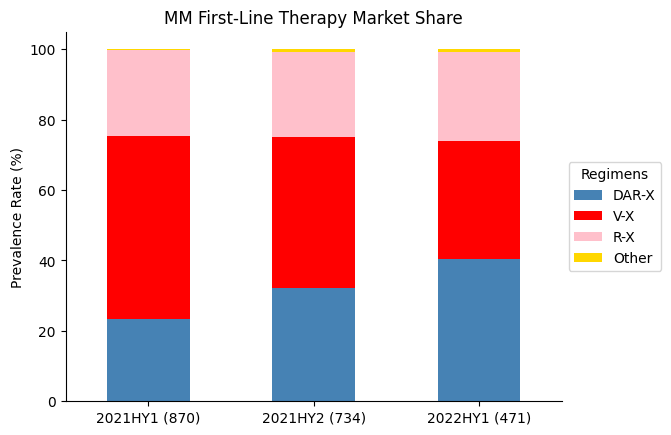

In [20]:
# Standardize columns names and order for first line therapy prevalence
first_1half_2021_prevalence_df_grouped = first_1half_2021_prevalence_df_grouped.rename('2021HY1 (870)')
first_1half_2021_prevalence_df_grouped
first_2half_2021_prevalence_df_grouped = first_2half_2021_prevalence_df_grouped.rename('2021HY2 (734)')
first_2half_2021_prevalence_df_grouped
first_1half_2022_prevalence_df_grouped = first_1half_2022_prevalence_df_grouped.rename('2022HY1 (471)')
first_1half_2022_prevalence_df_grouped

first_line_prevalence_plot_df = pd.DataFrame(first_2half_2021_prevalence_df_grouped).join(
                      first_1half_2021_prevalence_df_grouped).join(first_1half_2022_prevalence_df_grouped)

first_line_2022_prevalence_plot_df = first_line_prevalence_plot_df.T.fillna(0).reindex(['2021HY1 (870)','2021HY2 (734)','2022HY1 (471)'])
first_line_2022_prevalence_plot_df

first_line_2022_prevalence_plot_df=first_line_2022_prevalence_plot_df.apply(lambda x: (x / x.sum())*100, axis=1)
first_line_2022_prevalence_plot_df

col = ['Other','KYP-X','EMP-X','LEV-X']
first_line_2022_prevalence_plot_df['Other']=first_line_2022_prevalence_plot_df[col].sum(axis=1)
first_line_2022_prevalence_plot_df = first_line_2022_prevalence_plot_df.drop(
                                ['KYP-X','EMP-X','LEV-X'], axis=1)

first_line_2022_prevalence_plot_df=first_line_2022_prevalence_plot_df.reindex(columns=['DAR-X','V-X','R-X', 'Other'])
first_line_2022_prevalence_plot_df.plot(kind='bar', stacked=True, title='MM First-Line Therapy Market Share', 
                                 ylabel='Prevalence Rate (%)', 
                                 color=['steelblue','red', 'pink', 'gold']).legend(loc='center left',
                                                                            bbox_to_anchor=(1, 0.5), title='Regimens')

plt.ylim(bottom=0)
plt.xticks(rotation=0)
sns.despine()

pttm_regimen
DAR-X     76
EMP-X      1
R-X       69
V-X      222
Name: 2021HY1 (368), dtype: int64

pttm_regimen
DAR-X     85
EMP-X      1
KYP-X      2
LEV-X      1
Other      1
R-X       56
V-X      125
Name: 2021HY2 (271), dtype: int64

pttm_regimen
DAR-X    50
KYP-X     1
R-X      25
V-X      39
Name: 2022HY1 (115), dtype: int64

,2021HY2 (271),2021HY1 (368),2022HY1 (115)
pttm_regimen,,,
DAR-X,85,76.0,50.0
EMP-X,1,1.0,NaN
KYP-X,2,NaN,1.0
LEV-X,1,NaN,NaN
Other,1,NaN,NaN
R-X,56,69.0,25.0
V-X,125,222.0,39.0


pttm_regimen,DAR-X,EMP-X,KYP-X,LEV-X,Other,R-X,V-X
2021HY1 (368),76.0,1.0,0.0,0.0,0.0,69.0,222.0
2021HY2 (271),85.0,1.0,2.0,1.0,1.0,56.0,125.0
2022HY1 (115),50.0,0.0,1.0,0.0,0.0,25.0,39.0


pttm_regimen,DAR-X,EMP-X,KYP-X,LEV-X,Other,R-X,V-X
2021HY1 (368),206.521739,2.717391,0.000000,0.000000,0.000000,187.500000,603.260870
2021HY2 (271),313.653137,3.690037,7.380074,3.690037,3.690037,206.642066,461.254613
2022HY1 (115),434.782609,0.000000,8.695652,0.000000,0.000000,217.391304,339.130435


(array([-0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,
         2.  ,  2.25]),
 [Text(-0.25, 0, ''),
  Text(0.0, 0, '2021HY1 (368)'),
  Text(0.25, 0, ''),
  Text(0.5, 0, ''),
  Text(0.75, 0, ''),
  Text(1.0, 0, '2021HY2 (271)'),
  Text(1.25, 0, ''),
  Text(1.5, 0, ''),
  Text(1.75, 0, ''),
  Text(2.0, 0, '2022HY1 (115)'),
  Text(2.25, 0, '')])

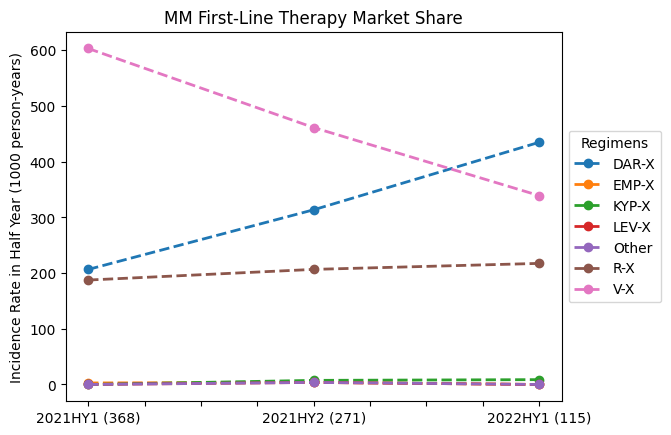

In [84]:
# Standardize columns names and order for first line therapy
first_1half_2021_df_grouped=first_1half_2021_df_grouped.rename('2021HY1 (368)')
first_1half_2021_df_grouped
first_2half_2021_df_grouped=first_2half_2021_df_grouped.rename('2021HY2 (271)')
first_2half_2021_df_grouped
first_1half_2022_df_grouped=first_1half_2022_df_grouped.rename('2022HY1 (115)')
first_1half_2022_df_grouped

first_line_plotdata = pd.DataFrame(first_2half_2021_df_grouped).join(
                      first_1half_2021_df_grouped).join(first_1half_2022_df_grouped)
first_line_plotdata
first_line_plotdata = first_line_plotdata.T.fillna(0).copy()
first_line_plotdata = first_line_plotdata.reindex(['2021HY1 (368)','2021HY2 (271)','2022HY1 (115)'])
first_line_plotdata
first_line_plotdata_incidence=first_line_plotdata.apply(lambda x: (x / x.sum())*1000, axis=1)
first_line_plotdata_incidence
first_line_plotdata_incidence.plot(kind='line', title='MM First-Line Therapy Market Share', 
                                ylabel='Incidence Rate in Half Year (1000 person-years)', linewidth=2, marker='o', linestyle='dashed'
                                ).legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Regimens')
plt.xticks(rotation=0)
#plt.savefig('first_list_dist.pdf')

(0.0, 633.2880434782609)

(array([0., 1., 2.]),
 [Text(0.0, 0, '2021HY1 (368)'),
  Text(1.0, 0, '2021HY2 (271)'),
  Text(2.0, 0, '2022HY1 (115)')])

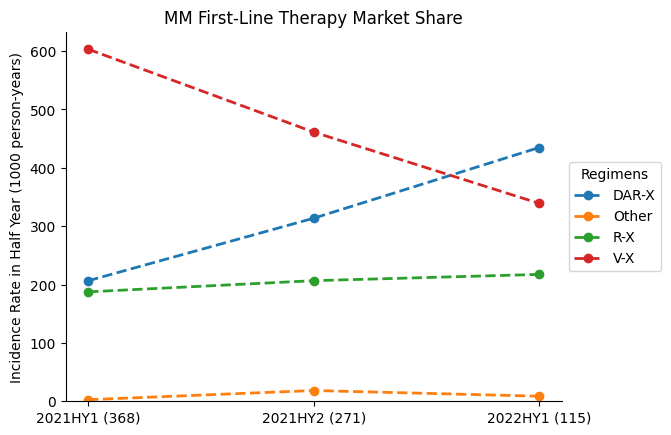

In [85]:
col = ['Other','KYP-X','EMP-X','LEV-X']
first_line_plotdata_incidence['Other']=first_line_plotdata_incidence[col].sum(axis=1)
first_line_plotdata_incidence = first_line_plotdata_incidence.drop(
                                ['KYP-X','EMP-X','LEV-X'], axis=1)
first_line_plotdata_incidence.plot(kind='line', title='MM First-Line Therapy Market Share', 
                                 ylabel='Incidence Rate in Half Year (1000 person-years)', linewidth=2, 
                                 marker='o', linestyle='dashed'
                                ).legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Regimens')

plt.ylim(bottom=0)
plt.locator_params(axis='x', nbins=3)
plt.xticks(rotation=0)
sns.despine()

(0.0, 1050.0000000000002)

(array([0, 1, 2]),
 [Text(0, 0, '2021HY1 (368)'),
  Text(1, 0, '2021HY2 (271)'),
  Text(2, 0, '2022HY1 (115)')])

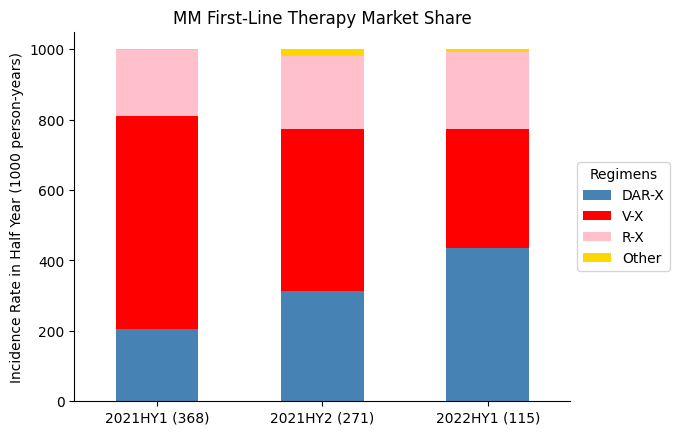

In [88]:
first_line_plotdata_incidence=first_line_plotdata_incidence.reindex(columns=['DAR-X','V-X','R-X', 'Other'])
first_line_plotdata_incidence.plot(kind='bar', stacked=True, title='MM First-Line Therapy Market Share', 
                                 ylabel='Incidence Rate in Half Year (1000 person-years)', 
                                 color=['steelblue','red', 'pink', 'gold']).legend(loc='center left',
                                                                            bbox_to_anchor=(1, 0.5), title='Regimens')

plt.ylim(bottom=0)
plt.xticks(rotation=0)
sns.despine()

m1tm_regimen
DAR-X    123
EMP-X      7
ISA-X      1
KYP-X     56
LEV-X      4
NIN-X     12
POM-X      2
R-X       31
V-X       38
Name: 2021HY1, dtype: int64

m1tm_regimen
DAR-X    117
EMP-X      3
KYP-X     73
LEV-X      3
NIN-X     24
POM-X      6
R-X       43
V-X       30
Name: 2021HY2, dtype: int64

m1tm_regimen
DAR-X    98
EMP-X     1
KYP-X    44
NIN-X     4
R-X      37
V-X       8
Name: 2022HY1, dtype: int64

,2021HY1,2021HY2,2022HY1
m1tm_regimen,,,
DAR-X,123,117.0,98.0
EMP-X,7,3.0,1.0
ISA-X,1,NaN,NaN
KYP-X,56,73.0,44.0
LEV-X,4,3.0,NaN
NIN-X,12,24.0,4.0
POM-X,2,6.0,NaN
R-X,31,43.0,37.0
V-X,38,30.0,8.0


m1tm_regimen,DAR-X,EMP-X,ISA-X,KYP-X,LEV-X,NIN-X,POM-X,R-X,V-X
2021HY1,123.0,7.0,1.0,56.0,4.0,12.0,2.0,31.0,38.0
2021HY2,117.0,3.0,0.0,73.0,3.0,24.0,6.0,43.0,30.0
2022HY1,98.0,1.0,0.0,44.0,0.0,4.0,0.0,37.0,8.0


(array([-0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,
         2.  ,  2.25]),
 [Text(-0.25, 0, ''),
  Text(0.0, 0, '2021HY1'),
  Text(0.25, 0, ''),
  Text(0.5, 0, ''),
  Text(0.75, 0, ''),
  Text(1.0, 0, '2021HY2'),
  Text(1.25, 0, ''),
  Text(1.5, 0, ''),
  Text(1.75, 0, ''),
  Text(2.0, 0, '2022HY1'),
  Text(2.25, 0, '')])

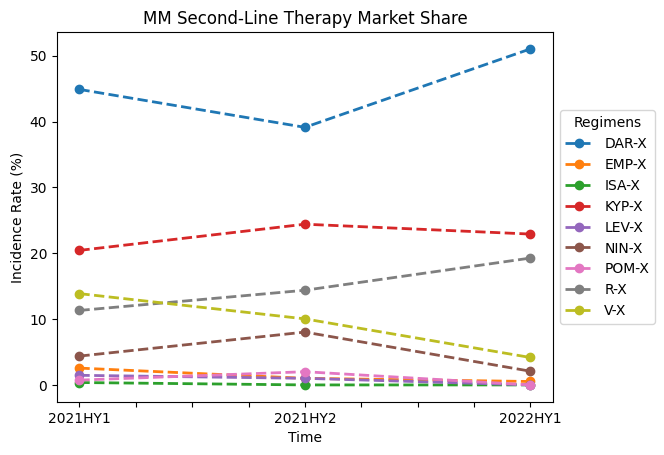

In [18]:
# Standardize columns names and order for second line therapy
second_1half_2021_df_grouped=second_1half_2021_df_grouped.rename('2021HY1')
second_1half_2021_df_grouped
second_2half_2021_df_grouped=second_2half_2021_df_grouped.rename('2021HY2')
second_2half_2021_df_grouped
second_1half_2022_df_grouped=second_1half_2022_df_grouped.rename('2022HY1')
second_1half_2022_df_grouped

second_line_plotdata = pd.DataFrame(second_1half_2021_df_grouped).join(second_2half_2021_df_grouped).join(second_1half_2022_df_grouped)
second_line_plotdata
second_line_plotdata = second_line_plotdata.T.fillna(0).copy()
second_line_plotdata
second_line_plotdata_percent=second_line_plotdata.apply(lambda x: (x / x.sum())*100, axis=1)
second_line_plotdata_percent.plot(kind='line', title='MM Second-Line Therapy Market Share', 
                                ylabel='Incidence Rate (%)', xlabel='Time', linewidth=2, marker='o', linestyle='dashed'
                                ).legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Regimens')
plt.xticks(rotation=0)

(0.0, 55.0)

(array([0., 1., 2.]),
 [Text(0.0, 0, '2021HY1'), Text(1.0, 0, '2021HY2'), Text(2.0, 0, '2022HY1')])

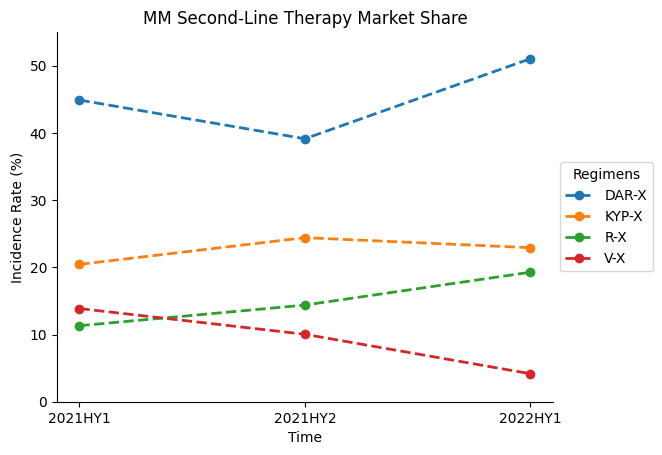

In [19]:
second_line_plotdata_percent = second_line_plotdata_percent.drop(
                                ['EMP-X','ISA-X','LEV-X','NIN-X','POM-X'], axis=1)
second_line_plotdata_percent.plot(kind='line', title='MM Second-Line Therapy Market Share', 
                                ylabel='Incidence Rate (%)', xlabel='Time', linewidth=2, 
                                marker='o', linestyle='dashed'
                                ).legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Regimens')
plt.ylim(bottom=0,top=55)
plt.locator_params(axis='x', nbins=3)
plt.xticks(rotation=0)
sns.despine()

m2tm_regimen
BLEN-X     1
DAR-X     60
EMP-X     12
ISA-X      2
KYP-X     23
NIN-X     13
POM-X     50
R-X        1
V-X        6
LEV-X      0
Name: 2021HY1, dtype: int64

m2tm_regimen
DAR-X    88
EMP-X    32
ISA-X     6
KYP-X    23
LEV-X     6
NIN-X    13
POM-X    30
R-X       5
V-X      28
Name: 2021HY2, dtype: int64

m2tm_regimen
DAR-X    44
EMP-X    33
ISA-X     7
KYP-X    15
NIN-X     3
POM-X    25
R-X       1
V-X      36
Name: 2022HY1, dtype: int64

,2021HY1,2021HY2,2022HY1
m2tm_regimen,,,
BLEN-X,1,NaN,NaN
DAR-X,60,88.0,44.0
EMP-X,12,32.0,33.0
ISA-X,2,6.0,7.0
KYP-X,23,23.0,15.0
NIN-X,13,13.0,3.0
POM-X,50,30.0,25.0
R-X,1,5.0,1.0
V-X,6,28.0,36.0


m2tm_regimen,BLEN-X,DAR-X,EMP-X,ISA-X,KYP-X,NIN-X,POM-X,R-X,V-X,LEV-X
2021HY1,1.0,60.0,12.0,2.0,23.0,13.0,50.0,1.0,6.0,0.0
2021HY2,0.0,88.0,32.0,6.0,23.0,13.0,30.0,5.0,28.0,6.0
2022HY1,0.0,44.0,33.0,7.0,15.0,3.0,25.0,1.0,36.0,0.0


m2tm_regimen,BLEN-X,DAR-X,EMP-X,ISA-X,KYP-X,NIN-X,POM-X,R-X,V-X,LEV-X
2021HY1,0.595238,35.714286,7.142857,1.190476,13.690476,7.738095,29.761905,0.595238,3.571429,0.000000
2021HY2,0.000000,38.095238,13.852814,2.597403,9.956710,5.627706,12.987013,2.164502,12.121212,2.597403
2022HY1,0.000000,26.829268,20.121951,4.268293,9.146341,1.829268,15.243902,0.609756,21.951220,0.000000


(array([-0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,
         2.  ,  2.25]),
 [Text(-0.25, 0, ''),
  Text(0.0, 0, '2021HY1'),
  Text(0.25, 0, ''),
  Text(0.5, 0, ''),
  Text(0.75, 0, ''),
  Text(1.0, 0, '2021HY2'),
  Text(1.25, 0, ''),
  Text(1.5, 0, ''),
  Text(1.75, 0, ''),
  Text(2.0, 0, '2022HY1'),
  Text(2.25, 0, '')])

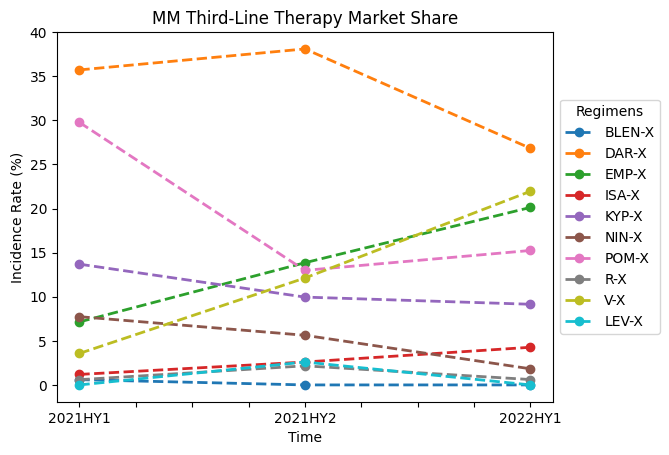

In [20]:
# Standardize columns names and order for third line therapy
third_1half_2021_df_grouped=third_1half_2021_df_grouped.rename('2021HY1')
third_1half_2021_df_grouped['LEV-X'] = 0
third_1half_2021_df_grouped
third_2half_2021_df_grouped=third_2half_2021_df_grouped.rename('2021HY2')
third_2half_2021_df_grouped
third_1half_2022_df_grouped=third_1half_2022_df_grouped.rename('2022HY1')
third_1half_2022_df_grouped

third_line_plotdata = pd.DataFrame(third_1half_2021_df_grouped).join(
                      third_2half_2021_df_grouped).join(third_1half_2022_df_grouped)
third_line_plotdata
third_line_plotdata = third_line_plotdata.T.fillna(0).copy()
third_line_plotdata
third_line_plotdata_percent=third_line_plotdata.apply(lambda x: (x / x.sum())*100, axis=1)
third_line_plotdata_percent
third_line_plotdata_percent.plot(kind='line', title='MM Third-Line Therapy Market Share', 
                                ylabel='Incidence Rate (%)', xlabel='Time', linewidth=2, marker='o', linestyle='dashed'
                                ).legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Regimens')
plt.xticks(rotation=0)

(0.0, 40.0)

(array([0., 1., 2.]),
 [Text(0.0, 0, '2021HY1'), Text(1.0, 0, '2021HY2'), Text(2.0, 0, '2022HY1')])

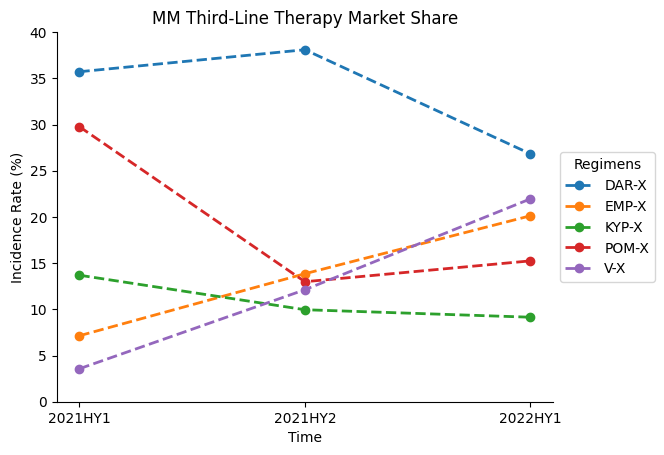

In [21]:
third_line_plotdata_percent = third_line_plotdata_percent.drop(
                                ['BLEN-X','ISA-X','LEV-X','NIN-X','R-X'], axis=1)
third_line_plotdata_percent.plot(kind='line', title='MM Third-Line Therapy Market Share', 
                                ylabel='Incidence Rate (%)', xlabel='Time', linewidth=2, 
                                marker='o', linestyle='dashed'
                                ).legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Regimens')
plt.ylim(bottom=0,top=40)
plt.locator_params(axis='x', nbins=3)
plt.xticks(rotation=0)
sns.despine()

m3tm_regimen
DAR-X     24
EMP-X     14
ISA-X      6
KYP-X     21
LEV-X      5
NIN-X     15
Other      3
POM-X     18
V-X        4
R-X        0
BLEN-X     0
Name: 2021HY1, dtype: int64

m3tm_regimen
DAR-X    27
EMP-X    19
ISA-X     5
KYP-X    22
LEV-X     5
NIN-X     6
POM-X    24
R-X       1
V-X      29
Name: 2021HY2, dtype: int64

m3tm_regimen
BLEN-X     1
DAR-X      5
EMP-X     27
ISA-X      3
KYP-X     10
LEV-X      1
NIN-X      5
POM-X     15
V-X        4
Name: 2022HY1, dtype: int64

,2021HY1,2021HY2,2022HY1
m3tm_regimen,,,
DAR-X,24,27.0,5.0
EMP-X,14,19.0,27.0
ISA-X,6,5.0,3.0
KYP-X,21,22.0,10.0
LEV-X,5,5.0,1.0
NIN-X,15,6.0,5.0
Other,3,NaN,NaN
POM-X,18,24.0,15.0
V-X,4,29.0,4.0


m3tm_regimen,DAR-X,EMP-X,ISA-X,KYP-X,LEV-X,NIN-X,Other,POM-X,V-X,R-X,BLEN-X
2021HY1,24.0,14.0,6.0,21.0,5.0,15.0,3.0,18.0,4.0,0.0,0.0
2021HY2,27.0,19.0,5.0,22.0,5.0,6.0,0.0,24.0,29.0,1.0,0.0
2022HY1,5.0,27.0,3.0,10.0,1.0,5.0,0.0,15.0,4.0,0.0,1.0


m3tm_regimen,DAR-X,EMP-X,ISA-X,KYP-X,LEV-X,NIN-X,Other,POM-X,V-X,R-X,BLEN-X
2021HY1,21.818182,12.727273,5.454545,19.090909,4.545455,13.636364,2.727273,16.363636,3.636364,0.000000,0.000000
2021HY2,19.565217,13.768116,3.623188,15.942029,3.623188,4.347826,0.000000,17.391304,21.014493,0.724638,0.000000
2022HY1,7.042254,38.028169,4.225352,14.084507,1.408451,7.042254,0.000000,21.126761,5.633803,0.000000,1.408451


(array([-0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,
         2.  ,  2.25]),
 [Text(-0.25, 0, ''),
  Text(0.0, 0, '2021HY1'),
  Text(0.25, 0, ''),
  Text(0.5, 0, ''),
  Text(0.75, 0, ''),
  Text(1.0, 0, '2021HY2'),
  Text(1.25, 0, ''),
  Text(1.5, 0, ''),
  Text(1.75, 0, ''),
  Text(2.0, 0, '2022HY1'),
  Text(2.25, 0, '')])

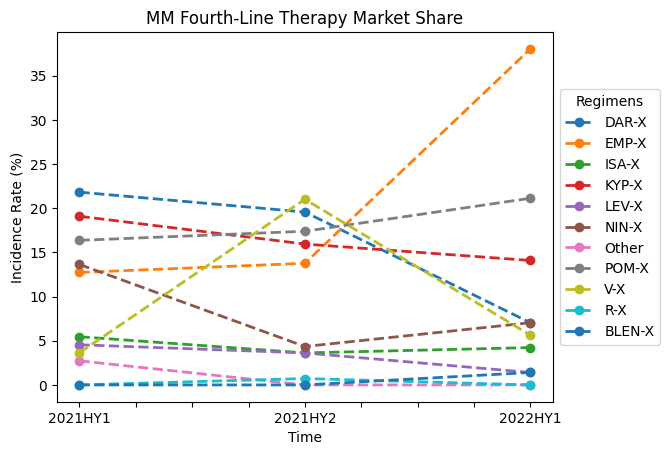

In [22]:
# Standardize columns names and order for fourth line therapy
fourth_1half_2021_df_grouped=fourth_1half_2021_df_grouped.rename('2021HY1')
fourth_1half_2021_df_grouped['R-X'] = 0
fourth_1half_2021_df_grouped['BLEN-X'] = 0
fourth_1half_2021_df_grouped
fourth_2half_2021_df_grouped=fourth_2half_2021_df_grouped.rename('2021HY2')
fourth_2half_2021_df_grouped
fourth_1half_2022_df_grouped=fourth_1half_2022_df_grouped.rename('2022HY1')
fourth_1half_2022_df_grouped

fourth_line_plotdata = pd.DataFrame(fourth_1half_2021_df_grouped).join(
                      fourth_2half_2021_df_grouped).join(fourth_1half_2022_df_grouped)
fourth_line_plotdata
fourth_line_plotdata = fourth_line_plotdata.T.fillna(0).copy()
fourth_line_plotdata
fourth_line_plotdata_percent=fourth_line_plotdata.apply(lambda x: (x / x.sum())*100, axis=1)
fourth_line_plotdata_percent
fourth_line_plotdata_percent.plot(kind='line', title='MM Fourth-Line Therapy Market Share', 
                                ylabel='Incidence Rate (%)', xlabel='Time', linewidth=2, marker='o', linestyle='dashed'
                                ).legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Regimens')
plt.xticks(rotation=0)